# Ejemplo de practico: estimaci√≥n de la precipitaci√≥n en el valle de M√©xico usando datos de pluvi√≥metros y radar meteorol√≥gico.

# Introducci√≥n.
El siguiente ejemplo forma parte del art√≠culo publicado por <cite data-cite="DiazViera2009">(Diaz,Et.Al,2009)</cite>, donde se presenta una modificaci√≥n del procedimiento geoestad√≠stico de estimaci√≥n espacial de la precipitaci√≥n introducido por Krajewski (1987), el cual aplica el m√©todo de cokriging ordinario, combinando im√°genes de radar meteorol√≥gico con datos de pluvi√≥metros. Aqu√≠, a diferencia del procedimiento de Krajewski, se incluye en el m√©todo de cokriging ordinario la dependencia espacial conjunta de radar-pluvi√≥metros mediante un modelo de corregionalizaci√≥n lineal. La metodolog√≠a propuesta es probada usando datos de pluvi√≥grafos y de radar de una tormenta ocurrida en el valle de la ciudad de M√©xico.

## Abrir el proyecto en R Studio.

El proyecto precargado lo pueden descargar en la p√°gina del curso http://www.esmg-mx.org/activities/courses/geoestadistica. Para el an√°lisis exploratorio descargamos la  Clase Pr√°ctica 1: An√°lisis Exploratorio de Datos. Se descomprime el archivo y podemos ver que el proyecto se compone de un conjunto de carpetas; la carpeta "Functions" donde encontraran las funciones que usaremos durante la clase pr√°ctica y la carpeta "Scripts" donde encontrar√°n los archivos "Getting_Started_script.R" y "00 Lluvia_AED_2D.R". El primer script contiene las instrucciones para definir directorios, instalar los paquetes, cargar librer√≠as y funciones, el segundo script contiene las instrucciones del ejemplo para hacer el an√°lisis exploratorio. Les recomendamos que el archivo "lluvia.txt" lo guarden en la carpeta "Data".

Para abrir el proyecto en R Studio deben dar doble clic en "RGeoestad_2D_Vacio.Rproj".

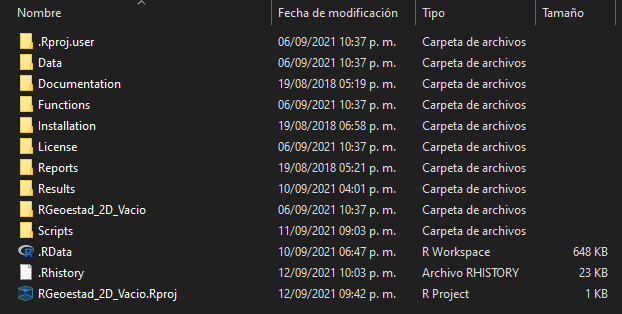

$\textbf{NOTA:}$ es importante que el proyecto se abra usando "RGeoestad_2D_Vacio.Rproj", si abren solo los scripts no podr√°n acceder a los directorios.


## Carga de paqueterias y funciones.

Para obtener la estimaci√≥n espacial debemos instalar en R Studio los siguientes paquetes: Rcpp, maps, mapproj, actuar, fields, fitdistrplus, geoR, gstat, MASS, moments, poweRlaw, RFOC, spatstat, ADGofTest, reshape, sp.

$\textbf{NOTA: la versi√≥n de R recomendada es 4.1.1}$, de lo contrario, no podr√°n instalar el paquete "actuar".

Hay dos formas de instalar estos paquetes: la primera opci√≥n es ir a la barra de men√∫s en la interfaz de R Studio, dar click en tools>install Packages.  En el rengl√≥n Packages pondr√°n los nombres de los paquetes separados por coma y despu√©s dan click en install.

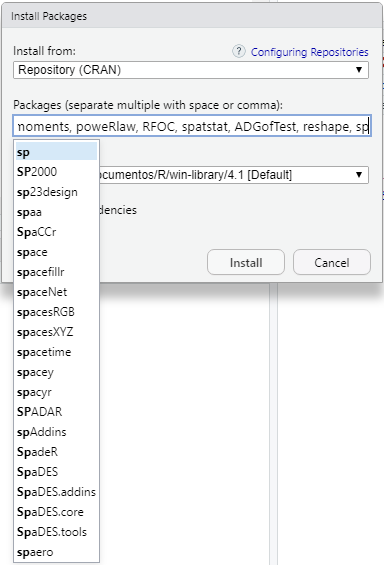

La segunda opci√≥n es usando la consola, para eso abrimos el script "Getting_Started_script.R" y ejecutar las siguientes lineas.

In [1]:
root_dir<-getwd()

#install_dir- installation directory

install_dir<-paste(root_dir,"/Installation",sep="")

setwd(install_dir)

install.packages("Rcpp")
install.packages("maps")
install.packages("mapproj")
install.packages("actuar")
install.packages("fields")
install.packages("fitdistrplus")
install.packages("geoR")
install.packages("gstat")
install.packages("MASS")
install.packages("moments")
install.packages("poweRlaw")
install.packages("RFOC")
install.packages("spatstat")
install.packages("ADGofTest")
install.packages("reshape")
install.packages("sp")

#set back to root work directory

Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'Rcpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'actuar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'fields' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'fitdistrplus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'geoR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gstat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'poweRlaw' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'RFOC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'spatstat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ADGofTest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Installing package into 'E:/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'sp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\danie\AppData\Local\Temp\Rtmp0YmHlY\downloaded_packages


Despues de instalar los paquetes debemos cargarlos de la siguiente forma:

In [2]:
setwd(root_dir)

#### Load Packages ####
library(actuar)
library(Rcpp)
library(maps)
library(mapproj)
library(fields)
library(fitdistrplus)
library(geoR)
library(gstat)
library(MASS)
library(moments)
library(poweRlaw)
library(RFOC)
library(spatstat)
library(ADGofTest)
library(reshape)
library(sp)


Attaching package: 'actuar'


The following object is masked from 'package:grDevices':

    cm


Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:maps':

    unemp


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 

Loading required package: MASS

Loading required package: survival

--------------------------------------------------------------
 Analysis of Geostatistical

Comprobamos que todos los paquetes hayan sido cargados, si es asi, cargaremos las funciones. Estas nos permitir√°n obtener los graficos, modelos, etc.

In [3]:
root_dir<-getwd()

function_dir<-paste(root_dir,"/Functions",sep="")

setwd(function_dir)

source("AllModel.R", encoding='ISO-8859-1')
source("BasicStats.R", encoding='ISO-8859-1')
source("BestModel.R", encoding='ISO-8859-1')
source("BestModel.R")
source("BestModelName.R")
source("CDF.R")
source("CoKrigingOrd.R")
source("CoKrigingOrdAnis.R")
source("CrossValidation.R")
source("CrossValidation2.R")
source("CrossVariograma.R")
source("DEspacial.R", encoding='ISO-8859-1')
source("Distance.R")
source("Estadisticas.R")
source("EyeModel.R", encoding='ISO-8859-1')
source("FitDistribution.R", encoding='ISO-8859-1')
source("GDEspacial.R", encoding='ISO-8859-1')
source("GDirecciones.R", encoding='ISO-8859-1')
source("GNormal.R", encoding='ISO-8859-1')
source("hist2.R")
source("HistBoxplot.R")
source("HistModel.R")
source("KrigingOrd.R", encoding='ISO-8859-1')
source("KrigingOrdAnis.R", encoding='ISO-8859-1')
source("ModelVariogram.R")
source("Modelo.R")
source("Outliers.R")
source("OutliersCount.R")
source("OutliersCountTwo.R")
source("OutliersPos.R")
source("OutliersTwo.R")
source("PPplot.R")
source("QQplot.R")
source("RangoParams.R")
source("Regresion.R")
source("ScatterPlot.R")
source("Tendencia.R")
source("Transformacion.R")
source("Trend.R")
source("Val_Estadisticos.R", encoding='ISO-8859-1')
source("Validacion.R", encoding='ISO-8859-1')
source("ValidacionCross.R", encoding='ISO-8859-1')
source("Variograma.R")
source("Variograma4D.R", encoding='ISO-8859-1')
source("hist2.R")
source("scaterplot.R")
source("scaterplotReg.R")
#source("PlotGridCells.R")

setwd(root_dir)

Para saber si todos los directorios fueron cargados adecuadamente, veremos que el directorio final mostrado en la consola es "RGeoestad_2D_Vacio" como se muestra en la siguiente imagen.

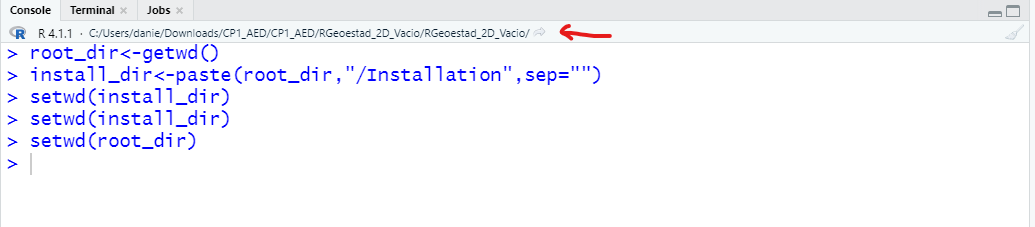

De lo contrario, se debe poner en la consola la instrucci√≥n "setwd(root_dir)" o bien se puede redirigir el directorio en la barra de menus>Session>Set Working Directory>To Project Directory. 

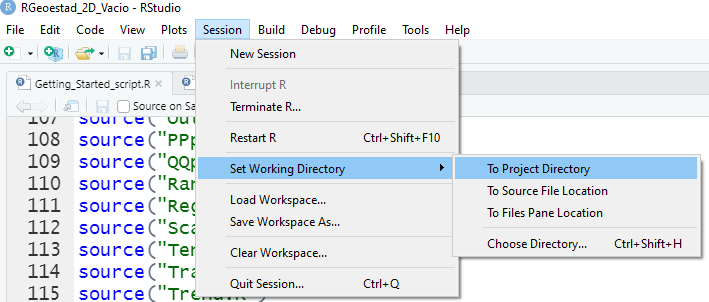

Despues de cargar las funciones podemos continuar con el an√°lisis exploratorio.

Es importante recordar que cada vez que se abre el proyecto en R Studio se deben cargar solo las librerias como se muestra en la siguiente imagen.

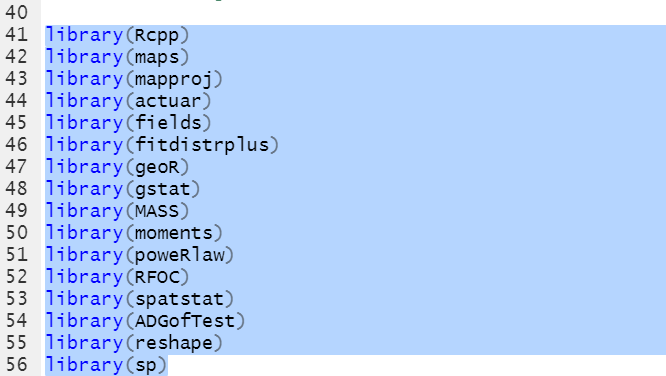

$\textbf{NOTA:}$ Si este proceso se hace en este notebook, se deben cargar solo las librerias y las funciones.

## Carga de datos.

Ahora tenemos que cargar los datos de cada variable con su respectiva posicion espacial en coordenadas UTM. Es importante que cada columna tenga su propio encabezado, as√≠ ser√° f√°cil localizarlos e indexarlos. Para seleccionar el archive que contiene la informaci√≥n que necesitamos, ejecutamos el comando ‚Äúread.table‚Äù, el cual contiene las siguientes tres instrucciones: file=file.choose(), esta instrucci√≥n indica que quieres seleccionar el archivo usando una ventana emergente similar a la mostrada en la siguiente imagen: 

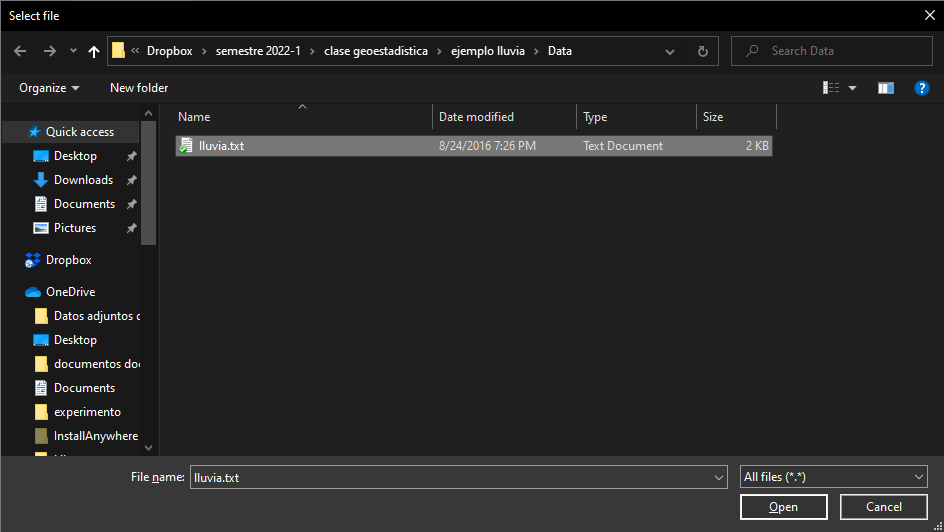

header=TRUE indica que las columnas tienen encabezado y  na.strings="-999.25" es una condicional para que cualquier celda nula sea llenada con el n√∫mero -999.25.

In [6]:
Data_File <- read.table(file=file.choose(),header=TRUE,na.strings="-999.25")

Si se desea abrir un archivo con informaci√≥n delimitada por comas (.csv) se cambia la instrucci√≥n por: "Data_File <- read.csv(file=file.choose(),header=T,na.strings="-999.25")" 

Para ordenar los resultados necesitamos crear una carpeta que usemos espec√≠ficamente para el an√°lisis exploratorio de datos (AED), ah√≠ se almacenar√°n tablas e im√°genes, esto lo hacemos con el comando "dir.create", donde le indicaremos la ruta donde se crear√° la carpeta AED.

$\textbf{Nota: no es necesario ejecutar esta l√≠nea m√°s de una vez, de lo contrario R Studio mostrar√° un error}$ "Warning message in dir.create(paste(getwd(), "/Results/AED", sep = ""))  already exists"

In [7]:
dir.create(paste(getwd(),"/Results/AED", sep=""))

Warning message in dir.create(paste(getwd(), "/Results/AED", sep = "")):
"'C:\Users\danie\Dropbox\semestre 2022-1\clase geoestadistica\ejemplo lluvia\Results\AED' already exists"


# An√°lisis exploratorio de datos.

Como se mostr√≥ en clase, el objetivo del an√°lisis exploratorio es examinar las variables aleatorias disponibles y establecer si estas cumplen con los supuestos que requiere la estimaci√≥n. Por lo tanto, debemos verificar su normalidad, linealidad, homocedasticidad, identificar los valores at√≠picos (outliers) y evaluar el impacto que tendr√°n estos valores durante el an√°lisis variogr√°fico y por supuesto, la estimaci√≥n.

Para este ejemplo las variables son los valores obtenidos de los pluvi√≥metros (Pluv_mm) y del radar meteorol√≥gico (Radar_mm), los cuales tienen una distribuci√≥n espacial en coordenadas UTM.

Despu√©s de cargar el archivo con la informaci√≥n y asignarle el nombre "Data_File", necesitamos las variables aleatorias y su posici√≥n espacial. Esto lo podemos hacer de la siguiente forma: 

In [8]:
XCoord<-Data_File$UTM_X_m      #Coordenada UTM en x
YCoord<-Data_File$UTM_Y_m      #Coordenada UTM en y
Radar_mm<-Data_File$Radar_mm   #variable con la informaci√≥n del radar metereol√≥gico
Pluv_mm<-Data_File$Pluv_mm     #variable con la informaci√≥n de los pluvi√≥metros

Ya que tenemos las variables necesitamos saber sobre sus estad√≠grafos, esto lo podemos calcular usando la funci√≥n "Estadisticas". Es importante mencionar que los valores calculados en este paso se usar√°n en los gr√°ficos.

In [9]:
XCoord_Stat<-Estadisticas(XCoord)
YCoord_Stat<-Estadisticas(YCoord)
Radar_mm_Stat<-Estadisticas(Radar_mm)
Pluv_mm_Stat<-Estadisticas(Pluv_mm)

##  An√°lisis estad√≠stico univariado.

Para la interpretaci√≥n estad√≠stica univariada comenzaremos dos elementos: la tabla con los valores estad√≠sticos y el histograma con boxplot. La tabla con los estad√≠grafos la obtenemos usando la funci√≥n "Val_Estadisticos" y la guardamos en la carpeta "AED" con la instrucci√≥n "write.csv".

In [10]:
Data_File_Stat <- Val_Estadisticos(Data_File)
write.csv(Data_File_Stat , file = "Results/AED/Data_File_Stat.csv")  #esta linea sirve para guardar los resultados en un archivo csv
print(Data_File_Stat[,3:4])

                   Radar_mm  Pluv_mm
No_muestras        50.00000 50.00000
Minimo              0.18000  0.25000
Cuartil_1er         0.87750  0.31250
Mediana             1.42500  1.00000
Media               1.83500  1.47000
Cuartil_3er         2.37500  1.93750
Maximo              7.79000  7.75000
Rango               7.61000  7.50000
Rango_Intercuartil  1.49750  1.62500
Varianza            2.47352  2.57561
Desv_Estandar       1.57274  1.60487
Simetria            2.02492  2.46929
Curtosis            7.99412 10.05416


### An√°lisis estad√≠stico univariado para el radar metereol√≥gico (Radar_mm).

El histograma con boxplot se grafica usando la funci√≥n "HistBoxplot", esta necesita que le indiquemos el vector con los valores (x), su valor esperado (mean) y su mediana (median). Si observan la instrucci√≥n para obtener el histograma para el radar meteorol√≥gico, el valor esperado y la mediana la toma de la tabla que se gener√≥ con la funci√≥n "Estadisticas". Por ejemplo, la instrucci√≥n "Radar_mm_Stat[5,2]" indica que el valor esperado se encuentra en la fila 5 columna 2. tambi√©n podemos indicar el n√∫mero de bins que necesitamos, en este caso es "nbin = 9", es importante recordar que el n√∫mero por default que encontrar√°n es 9, pero puede cambiarse seg√∫n las necesidades del usuario.

La funci√≥n "HistBoxplot" puede generar dos tipos de histograma: de frecuencia absoluta y de frecuencia relativa. Para obtener el histograma de frecuencia absoluta debemos indicar que "AbsFreq = TRUE, PercentFreq = FALSE" y para el histograma de frecuencia relativa debemos indicar que "AbsFreq = FALSE, PercentFreq = TRUE".

El histograma para el radar metereol√≥gico (Radar_mm) con frecuencia absoluta es:

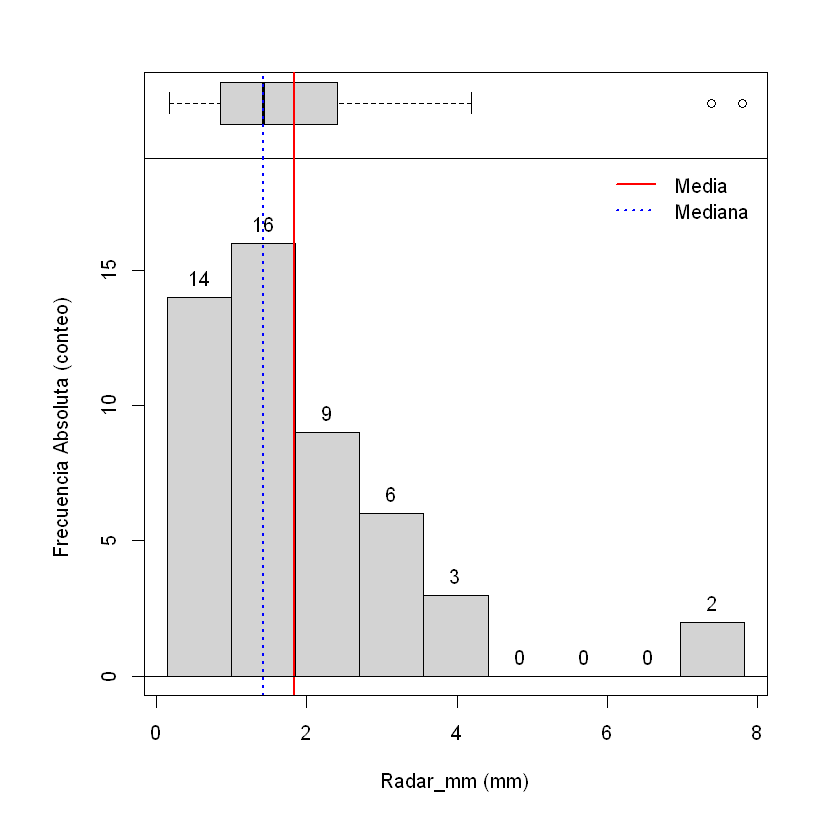

In [11]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="",  
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma del radar metereol√≥gico con frecuencia relativa es:

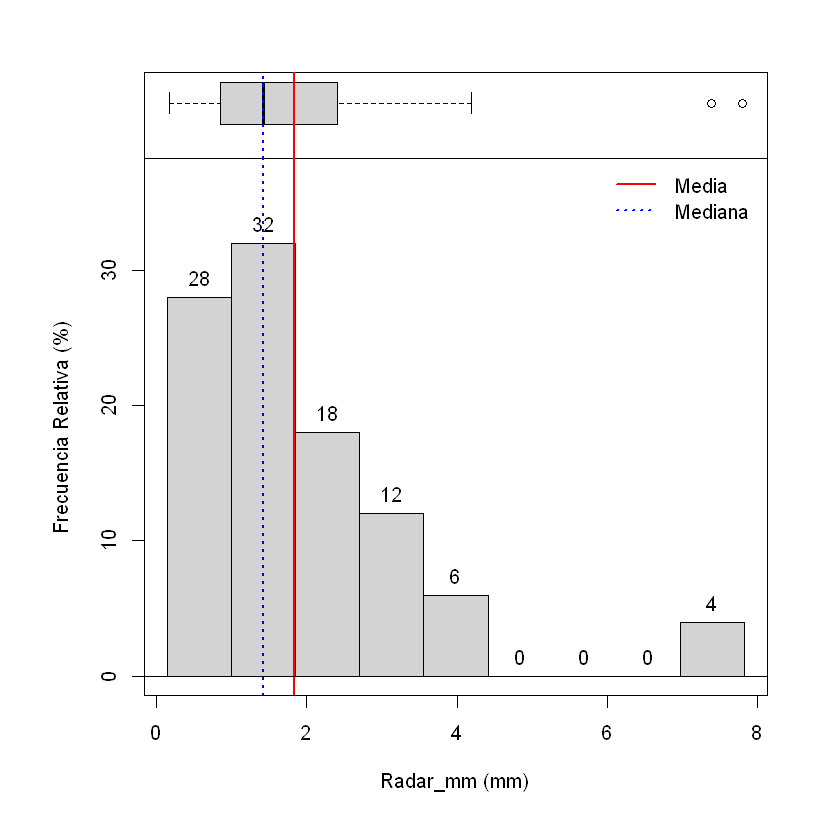

In [10]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="", 
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando los histogramas y los estad√≠grafos de la variable del radar meteorol√≥gico (Radar_mm) tiene una diferencia entre la media y la mediana de 0.47, su coeficiente de asimetr√≠a es de 2.46929, lo cual significa que la variable es asim√©trica. Esto se confirma con los histogramas, los cuales muestran que la asimetr√≠a es positiva. Tambi√©n podemos notar que el boxplot muestra dos valores at√≠picos localizados en el extremo derecho. El valor de la curtosis es de 7.99412, lo cual nos indica que es leptoc√∫rtica.

Para saber cu√°les son esos valores at√≠picos usamos la funci√≥n "OutliersPos".

In [12]:
Radar_mm_outliers<-OutliersPos(Radar_mm)
Data_File[Radar_mm_outliers,c(1,2,3)]

UTM_X_m UTM_Y_m Radar_mm
32 482135  2129478 7.79    
36 497898  2129469 7.39

Ah√≠ podemos notar que la muestra 32 y 36 son los valores at√≠picos, por lo que retiramos esos valores de la variable, esto lo hacemos usando una variable nueva que llamaremos "Radar_mm_out". Tambi√©n necesitamos calcular los valores estad√≠sticos de esta nueva variable.

$\textbf{NOTA: retirar los valores at√≠picos no significa que no usaremos m√°s adelante, los necesitaremos para saber si es conveniente o no quitarlos, para eso se genera un nuevo vector.}$. Por ejemplo, el vector "Radar_mm" es el vector original, el vector "Radar_mm_out" contiene todos los valores excepto aquellos que fueron se√±alados como valores at√≠picos.

In [13]:
Radar_mm_out<-Radar_mm[-Radar_mm_outliers]
Radar_mm_out_Stat<-Estadisticas(Radar_mm_out)
Radar_mm_out_Stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum             0.1800
cuantiles1 1st. Quartile       0.8050
medianas   Median              1.3500
medias     Mean                1.5952
cuantiles3 3rd. Quartile       2.2475
maximos    Maximum             4.1900
rangos     Rank                4.0100
rangosInt  Interquartile Rank  1.4425
varianzas  Variance            1.1090
desvs      Standard Deviation  1.0531
CVs        Variation Coeff.    0.6602
simetrias  Skewness            0.6937
curtosiss  Kurtosis            2.7723

Volvemos a graficar el histograma para los valores obtenidos con el radar metereol√≥gico sin valores at√≠picos (Radar_mm_out) con frecuencia absoluta.

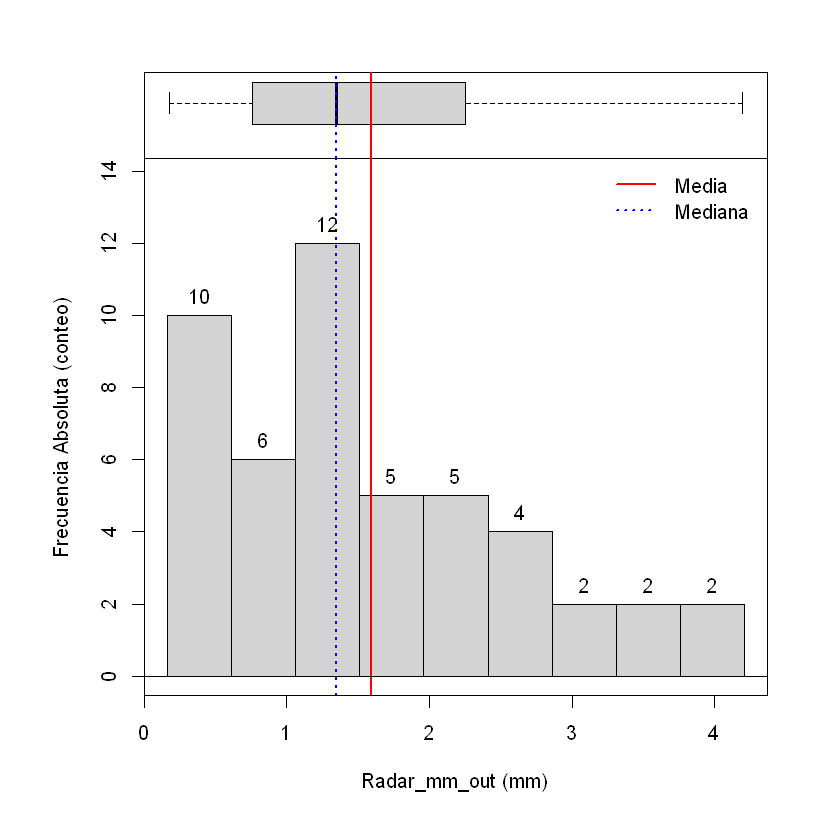

In [14]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="",  
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma para los valores obtenidos con el radar metereol√≥gico sin valores at√≠picos (Radar_mm_out) con frecuencia relativa.

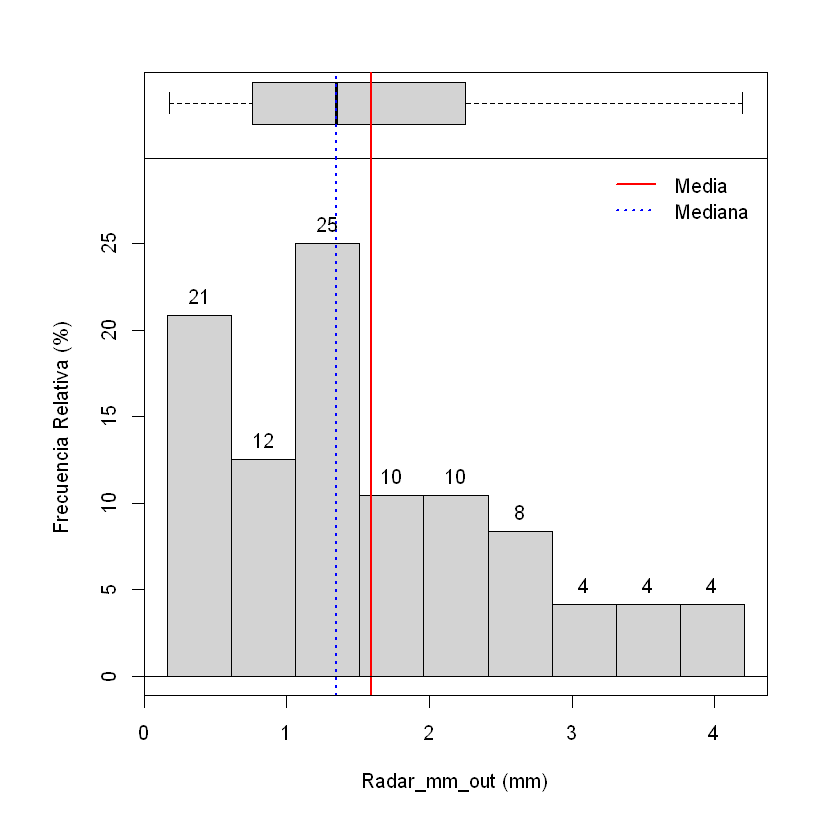

In [15]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando la diferencia entre me media y la mediana de esta nueva variable es de 0.2452 y su asimetr√≠a es de 0.6937. En principio esto nos indica que la asimetr√≠a disminuy√≥, sin embargo, la variable sigue mostrando asimetr√≠a positiva. Con el caso de la curtosis, el valor pas√≥ de 7.99412 a 2.7723, con lo cual consideramos que es planic√∫rtica.

Ahora podemos observar que los boxplot no muestran nuevos valores at√≠picos para la variable del radar meteorol√≥gico sin valores at√≠picos (Radar_mm_out). Esto lo podemos confirmar usando la funci√≥n "OutliersPos".

In [16]:
Radar_mm_out_outliers<-OutliersPos(Radar_mm_out)
print(Radar_mm_out_outliers)

numeric(0)


#### Transformaci√≥n de variable para el radar metereol√≥gico (Radar_mm).

Dado que no se logr√≥ obtener la normalidad en esta variable, podemos usar alguna transformaci√≥n. 

En estad√≠stica, la transformaci√≥n de datos es la aplicaci√≥n de una funci√≥n matem√°tica determinista a cada punto en un conjunto de datos, es decir, cada punto de datos $z_i$ se reemplaza con el valor transformado $y_i=f(z_i)$, donde $f$ es una funci√≥n.

Las transformaciones generalmente se aplican para que los datos parezcan cumplir m√°s con los supuestos de un procedimiento de inferencia estad√≠stica que se aplicar√° o para mejorar la interpretabilidad o la apariencia de los gr√°ficos. 

Las razones m√°s comunes para aplicar una transformaci√≥n son:

* Reducir la asimetr√≠a.
* Lograr relaciones de dependencia lineales o cuasi lineales
* Conveniencia.

Las transformaciones m√°s comunes son:

| Asimetr√≠as positivas | Ecuaci√≥n | Asimetr√≠as negativas | Ecuaci√≥n |
| :------------------ | :------ | :------------------ | :------ | 
| Ra√≠z cuadrada | $$v_{at}=\sqrt{v_a}$$ | Potencias | $$v_{at}=v_a^n$$ |
| Logar√≠tmica | $$v_{at}=Log(v_a)$$ | Arcseno | $$v_{at}=arcsen(v_a)$$ |
| Rec√≠proca | $$v_{at}=\frac{1}{v_a}$$ | Exponencial | $$v_{at}=exp(v_a)$$ |


Donde ${v_a}$ es la variable aleatoria y $v_{at}$ es la variable aleatoria transformada.

$\textbf{NOTA: El usuario debe saber si la transformaci√≥n puede ser usada en la variable aleatoria}$. Por ejemplo, si la variable aleatoria contiene muestras con valor cero, entonces no podr√° usar las transformaciones logar√≠tmica o reciproca. Si desea usar la transformaci√≥n arcseno, la variable aleatoria debe tener componente trigonom√©trica.

Dado que la variable del radar meteorol√≥gico (Radar_mm) presenta asimetr√≠a positiva, se van a usar dos tipos de transformaciones: ra√≠z cuadrada y logar√≠tmica.

$\textbf{Transformaci√≥n de ra√≠z cuadrada}$

Empezaremos con la transformaci√≥n de ra√≠z cuadrada usando el vector "Radar_mm", la cual se hace de la siguiente forma:


In [19]:
Data_File$Radar_mm_Sqrt<-sqrt(Radar_mm)
Radar_mm_Sqrt <- Data_File$Radar_mm_Sqrt

Ya que obtenemos la variable aleatoria transformada por raiz cuadrada (Radar_mm_Sqrt), debemos obtener sus estad√≠grafos.

In [20]:
# Estad√≠stica basica
Radar_mm_Sqrt_Stat<-Estadisticas(Radar_mm_Sqrt) #estos valores los necesitamos para poder graficar los histogramas

# Estad√≠stica basica comparativa entre (Radar_mm) y la transformaci√≥n (Radar_mm_Sqrt)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5)]

Radar_mm Radar_mm_Sqrt
No_muestras        50.00000 50.00000     
Minimo              0.18000  0.42426     
Cuartil_1er         0.87750  0.93641     
Mediana             1.42500  1.19364     
Media               1.83500  1.25106     
Cuartil_3er         2.37500  1.54098     
Maximo              7.79000  2.79106     
Rango               7.61000  2.36679     
Rango_Intercuartil  1.49750  0.60456     
Varianza            2.47352  0.27536     
Desv_Estandar       1.57274  0.52474     
Simetria            2.02492  0.74939     
Curtosis            7.99412  3.86947

Y graficamos los histogramas con frecuencia absoluta y relativa de la transformaci√≥n ra√≠z cuadrada.

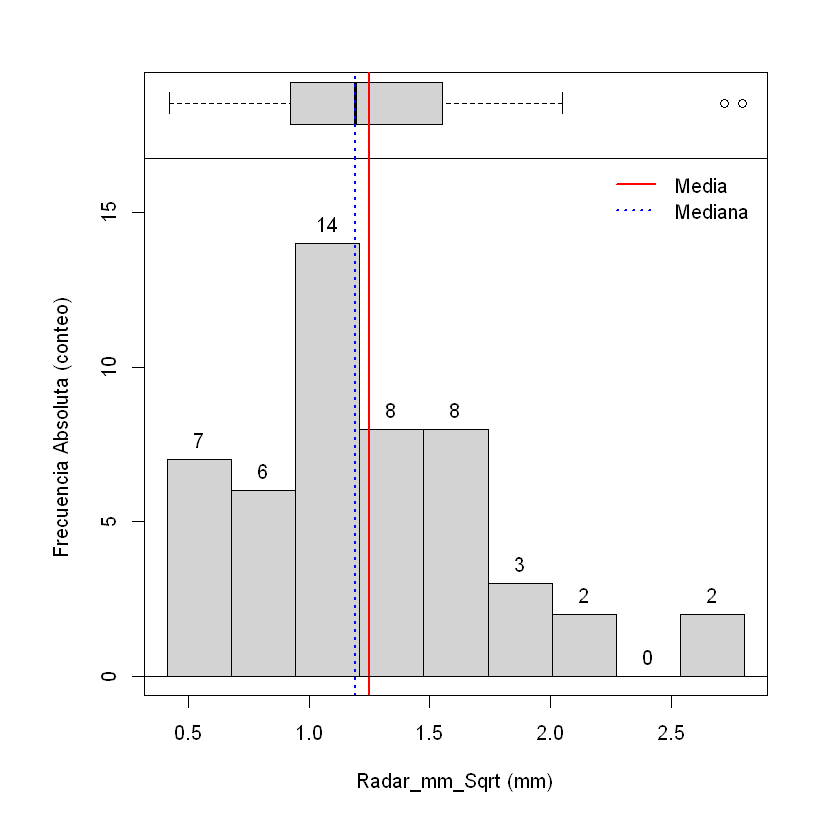

In [21]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

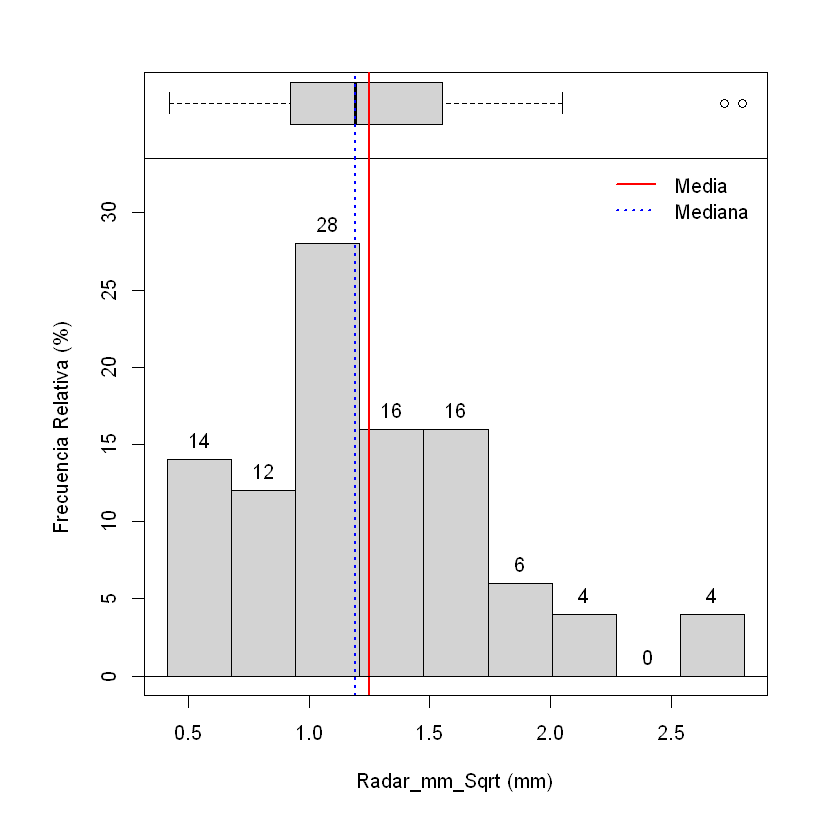

In [22]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Si observamos la diferencia entre la media y la mediana de la variable transformada (Radar_mm_Sqrt) podemos notar que es de 0.05742, lo cual podemos considerar como muy bajo en comparaci√≥n de la diferencia obtenida de la variable sin transformar que es de 0.47, sin embargo, observamos que el boxplot muestra la presencia de dos valores at√≠picos, los cuales debemos retirar y verificar que no afecten la supuesta simetr√≠a que hemos logrado con la transformaci√≥n.

In [23]:
Radar_mm_Sqrt_outliers<-OutliersPos(Radar_mm_Sqrt)
Data_File[Radar_mm_Sqrt_outliers,c(1,2,5)]

UTM_X_m UTM_Y_m Radar_mm_Sqrt
32 482135  2129478 2.791057     
36 497898  2129469 2.718455

Retiramos los valores at√≠picos y obtenemos los valores estad√≠sticos.

In [24]:
Radar_mm_Sqrt_out<-Radar_mm_Sqrt[-Radar_mm_Sqrt_outliers]
Radar_mm_Sqrt_out_stat<-Estadisticas(Radar_mm_Sqrt_out)
Radar_mm_Sqrt_out_stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum             0.4243
cuantiles1 1st. Quartile       0.8961
medianas   Median              1.1618
medias     Mean                1.1884
cuantiles3 3rd. Quartile       1.4992
maximos    Maximum             2.0469
rangos     Rank                1.6227
rangosInt  Interquartile Rank  0.6031
varianzas  Variance            0.1868
desvs      Standard Deviation  0.4322
CVs        Variation Coeff.    0.3637
simetrias  Skewness            0.0273
curtosiss  Kurtosis            2.2704

Y graficamos sus histogramas.

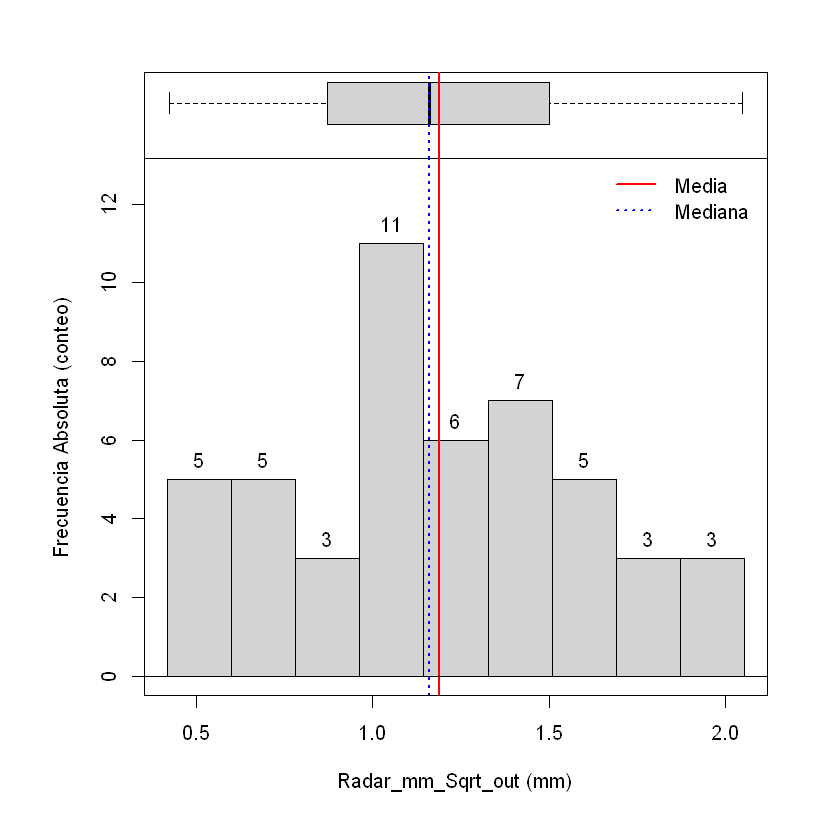

In [25]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

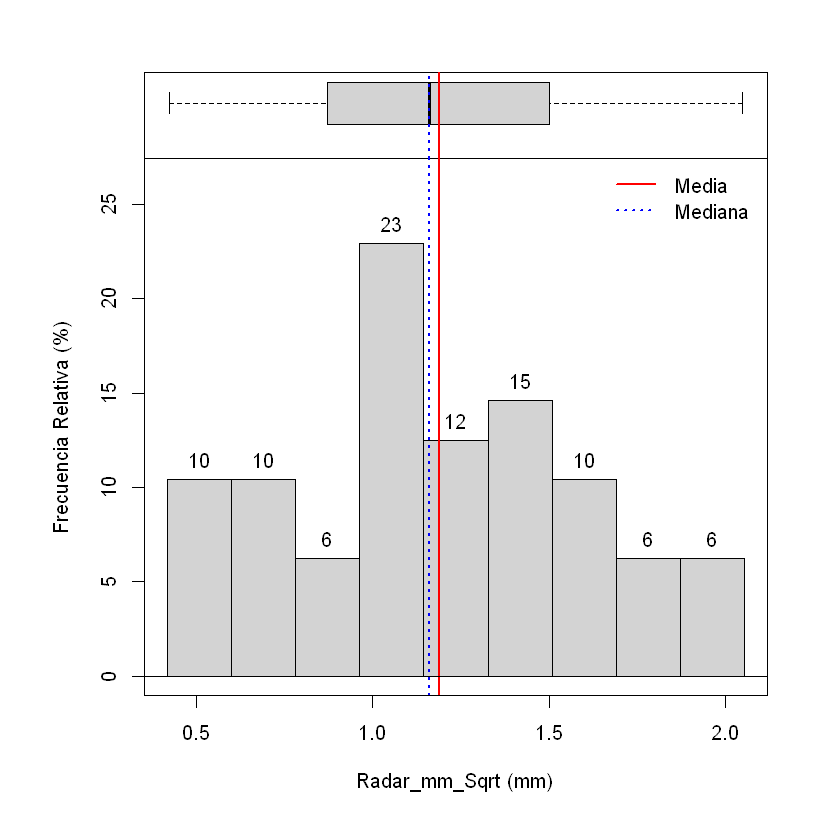

In [26]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Confirmamos que no existan m√°s valores at√≠picos.

In [27]:
OutliersPos(Radar_mm_Sqrt_out)

numeric(0)

Con los resultados obtenidos al retirar los dos valores at√≠picos podemos notar que la diferencia entre la media y la mediana pasaron de  0.05742 a 0.0266, podemos considerar que la transformaci√≥n cumpli√≥ su prop√≥sito al reducir de manera significativa la asimetr√≠a, sin embargo, comparando las muestras transformadas con y sin valores at√≠picos podr√≠a no justificar el retiro de los valores at√≠picos ya que es muy peque√±a la diferencia. 

$\textbf{Transformaci√≥n logar√≠tmica}$

Ahora probaremos usando la transformaci√≥n logar√≠tmica. La cual se hace de la siguiente forma:

In [28]:
Data_File$Radar_mm_Log<-log(Radar_mm)
Radar_mm_Log <- Data_File$Radar_mm_Log

y al igual que la transformada por ra√≠z cuadrada, obtenemos sus valores estad√≠sticos.

In [29]:
# Basic Statistics
Radar_mm_Log_Stat<-Estadisticas(Radar_mm_Log)

# Estad√≠stica basica comparativa entre (Radar_mm), la transformaci√≥n (Radar_mm_Sqrt) y (Radar_mm_Log)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5,6)]

Radar_mm Radar_mm_Sqrt Radar_mm_Log
No_muestras        50.00000 50.00000      50.00000    
Minimo              0.18000  0.42426      -1.71480    
Cuartil_1er         0.87750  0.93641      -0.13209    
Mediana             1.42500  1.19364       0.35387    
Media               1.83500  1.25106       0.26569    
Cuartil_3er         2.37500  1.54098       0.86467    
Maximo              7.79000  2.79106       2.05284    
Rango               7.61000  2.36679       3.76764    
Rango_Intercuartil  1.49750  0.60456       0.99676    
Varianza            2.47352  0.27536       0.79776    
Desv_Estandar       1.57274  0.52474       0.89317    
Simetria            2.02492  0.74939      -0.46105    
Curtosis            7.99412  3.86947       2.87206

Y graficamos sus respectivos histogramas.

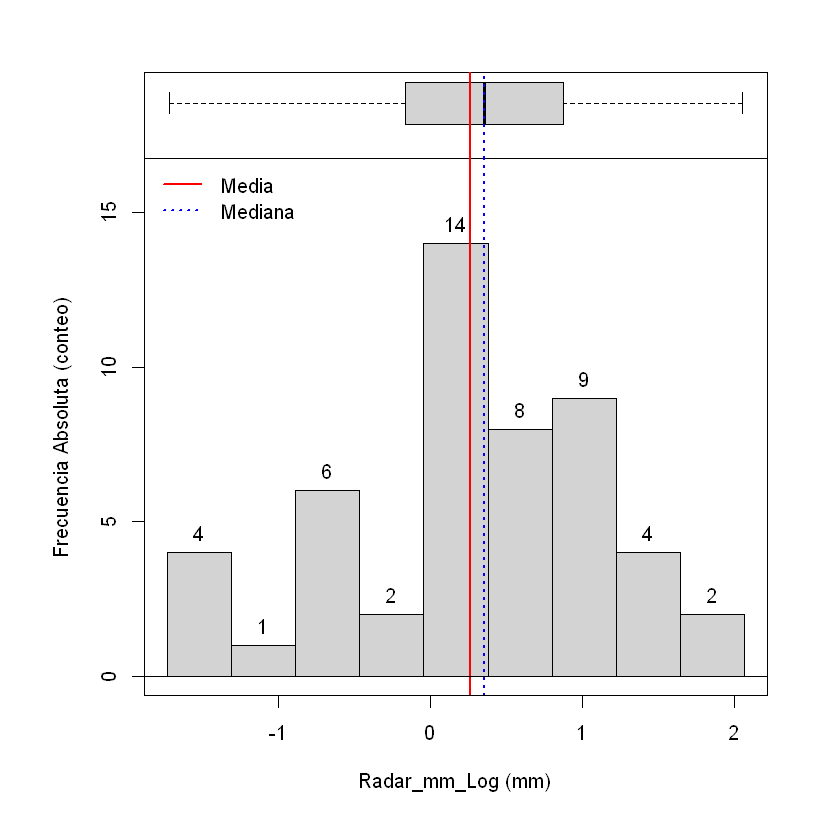

In [30]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="",  
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

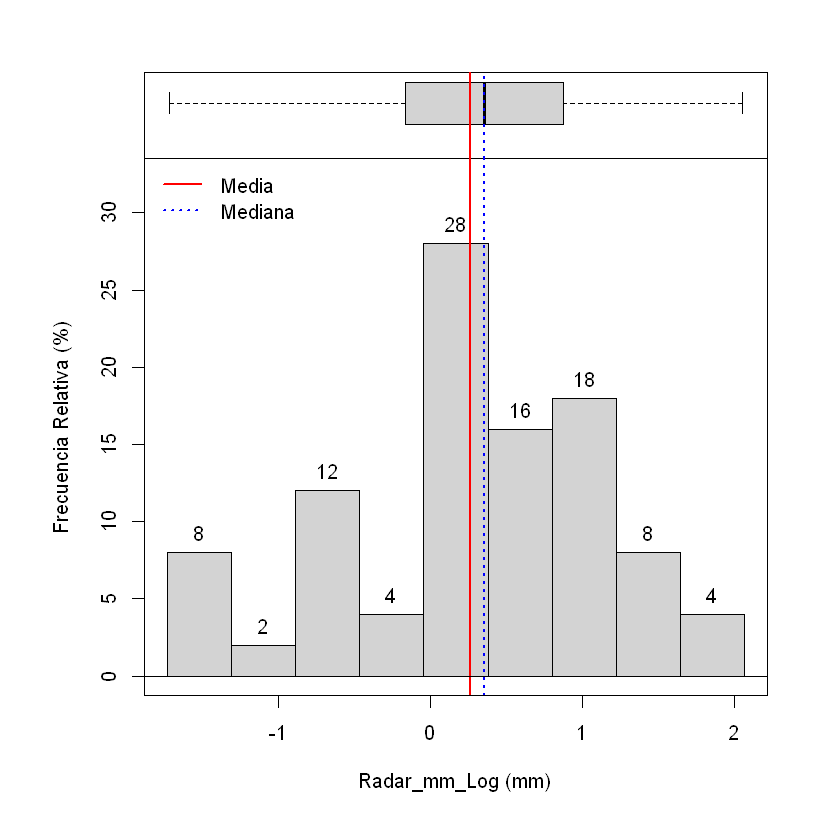

In [31]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformaci√≥n logar√≠tmica es de 0.08818, de forma aparente esta diferencia es mayor comparada con la transformaci√≥n por ra√≠z cuadrada. El boxplot indica que no existen valores at√≠picos, sin embargo, se usar√° la funci√≥n para detectar los valores at√≠picos.

In [32]:
Radar_mm_Log_outliers<-OutliersPos(Radar_mm_Log)
Data_File[Radar_mm_Log_outliers,c(1,2,6)]

UTM_X_m UTM_Y_m Radar_mm_Log
22 462178  2133934 -1.714798   
49 503149  2123937 -1.660731

Como podemos ver, la funci√≥n ha detectado dos valores at√≠picos, los cuales retiraremos y obtenemos sus valores estad√≠sticos.

In [33]:
Radar_mm_Log_out<-Radar_mm_Log[-Radar_mm_Log_outliers]

# Estad√≠stica b√°sica
Radar_mm_Log_out_Stat<-Estadisticas(Radar_mm_Log_out)
Radar_mm_Log_out_Stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum            -1.5606
cuantiles1 1st. Quartile      -0.0027
medianas   Median              0.3784
medias     Mean                0.3471
cuantiles3 3rd. Quartile       0.8868
maximos    Maximum             2.0528
rangos     Rank                3.6135
rangosInt  Interquartile Rank  0.8895
varianzas  Variance            0.6625
desvs      Standard Deviation  0.8140
CVs        Variation Coeff.    2.3451
simetrias  Skewness           -0.3448
curtosiss  Kurtosis            2.9797

Y graficamos sus histogramas: 

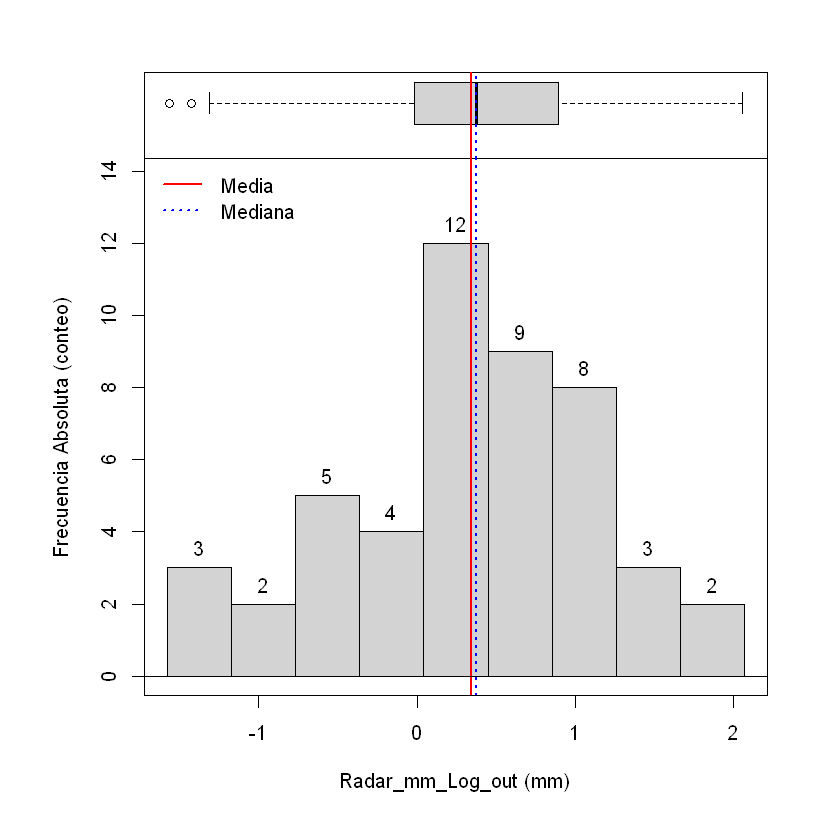

In [34]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

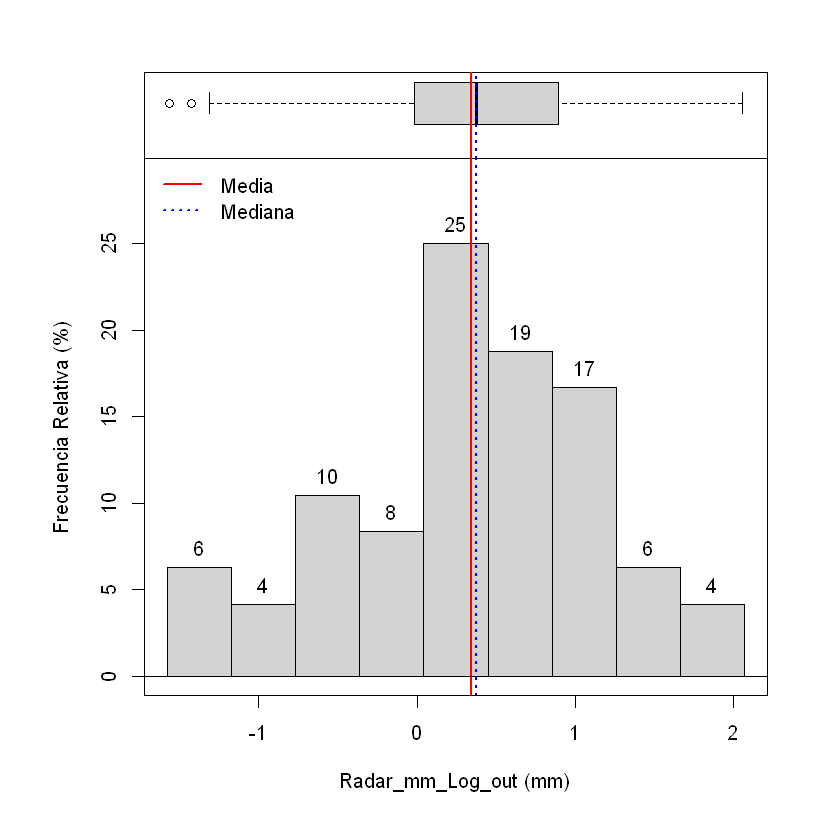

In [35]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformaci√≥n logar√≠tmica quitando los valores at√≠picos detectados pas√≥ de 0.08818 a 0.0313, sin embargo, el boxplot muestran dos valores at√≠picos localizados a la izquierda del gr√°fico. Por lo tanto, retiraremos esos nuevos valores at√≠picos.

In [36]:
Radar_mm_Log_outliers2<-OutliersPos(Radar_mm_Log_out)
Radar_mm_Log_out[Radar_mm_Log_outliers2]

[1] -1.427116 -1.560648

Y hacemos un analisis estad√≠stico de este nuevo conjunto de valores.

In [37]:
# Variable without distributional outliers 2
Radar_mm_Log_out2<-Radar_mm_Log_out[-Radar_mm_Log_outliers2]

#2¬∫ analisis sin valores atipicos
# Estad√≠stica b√°sica
Radar_mm_Log_out2_Stat<-Estadisticas(Radar_mm_Log_out2)
Radar_mm_Log_out2_Stat

Statistics         Values 
muestras   n                  46.0000
minimos    Minimum            -1.3093
cuantiles1 1st. Quartile       0.0440
medianas   Median              0.3920
medias     Mean                0.4271
cuantiles3 3rd. Quartile       0.9011
maximos    Maximum             2.0528
rangos     Rank                3.3622
rangosInt  Interquartile Rank  0.8571
varianzas  Variance            0.5346
desvs      Standard Deviation  0.7312
CVs        Variation Coeff.    1.7118
simetrias  Skewness           -0.1103
curtosiss  Kurtosis            2.9190

Y graficamos su respectivo histograma.

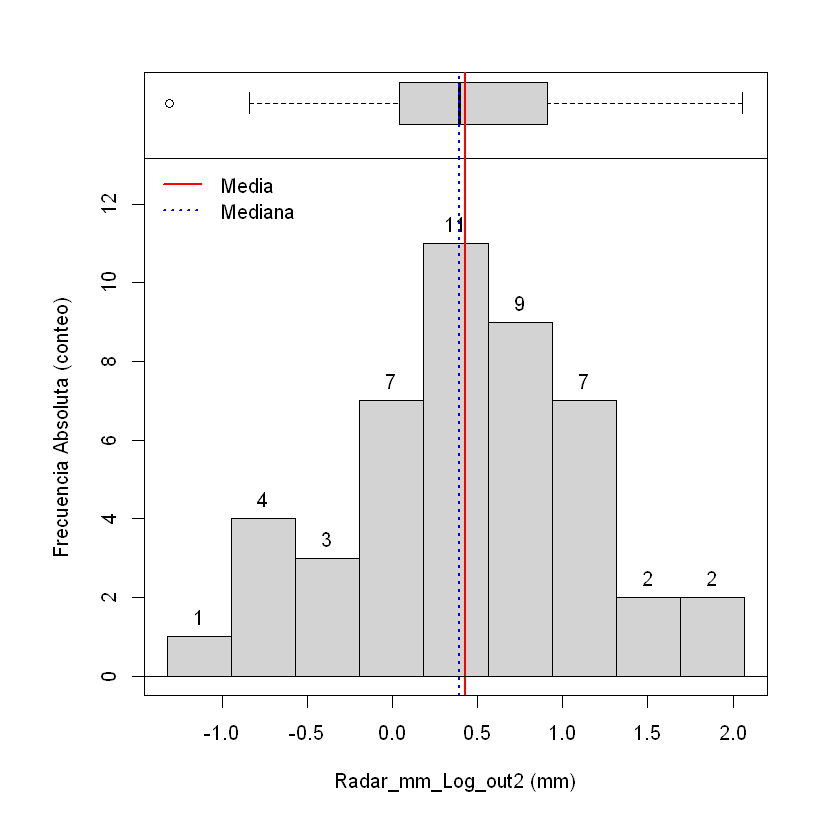

In [38]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

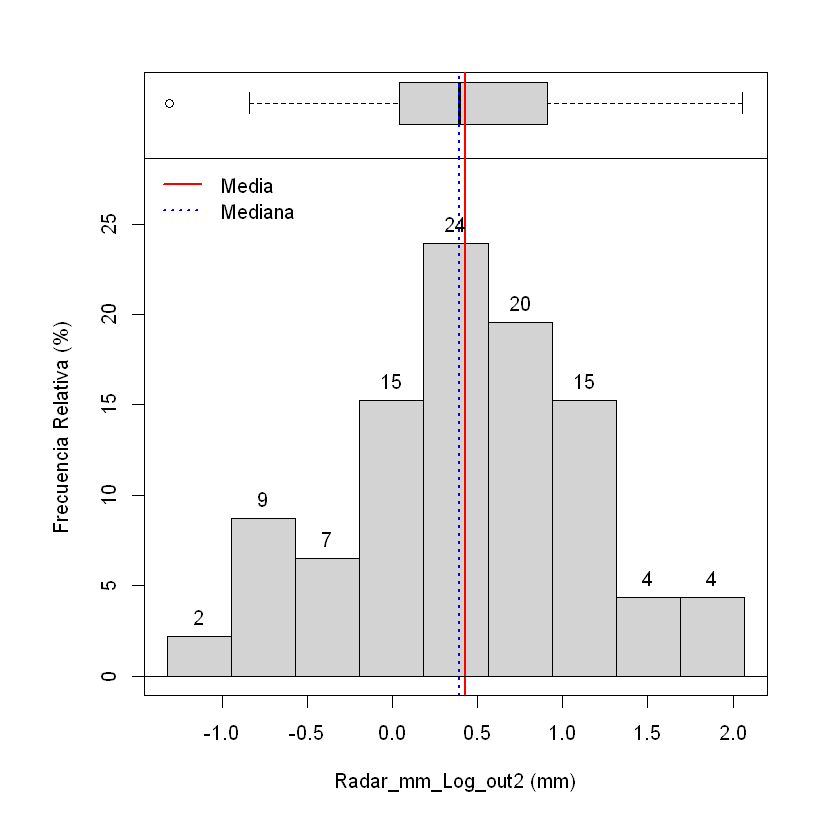

In [39]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformaci√≥n logar√≠tmica quitando los valores at√≠picos detectados pas√≥ de 0.0313 a 0.0351, es decir, aument√≥ el valor, sin ser significativo este aumento, con lo cual podemos considerar que hacer el segundo retiro de valores at√≠picos es innecesario.

### An√°lisis estad√≠stico univariado para los datos obtenidos de pluvi√≥metros (Pluv_mm).

Ahora se hace el mismo an√°lisis estad√≠stico a los datos obtenidos de los pluvi√≥metros (Pluv_mm). Empezamos obteniendo los valores estad√≠sticos.

In [40]:
Pluv_mm_Stat <- Estadisticas(Pluv_mm)
Pluv_mm_Stat

Statistics         Values 
muestras   n                  50.0000
minimos    Minimum             0.2500
cuantiles1 1st. Quartile       0.3125
medianas   Median              1.0000
medias     Mean                1.4700
cuantiles3 3rd. Quartile       1.9375
maximos    Maximum             7.7500
rangos     Rank                7.5000
rangosInt  Interquartile Rank  1.6250
varianzas  Variance            2.5756
desvs      Standard Deviation  1.6049
CVs        Variation Coeff.    1.0917
simetrias  Skewness            2.4693
curtosiss  Kurtosis           10.0542

Y su respectivo histograma.

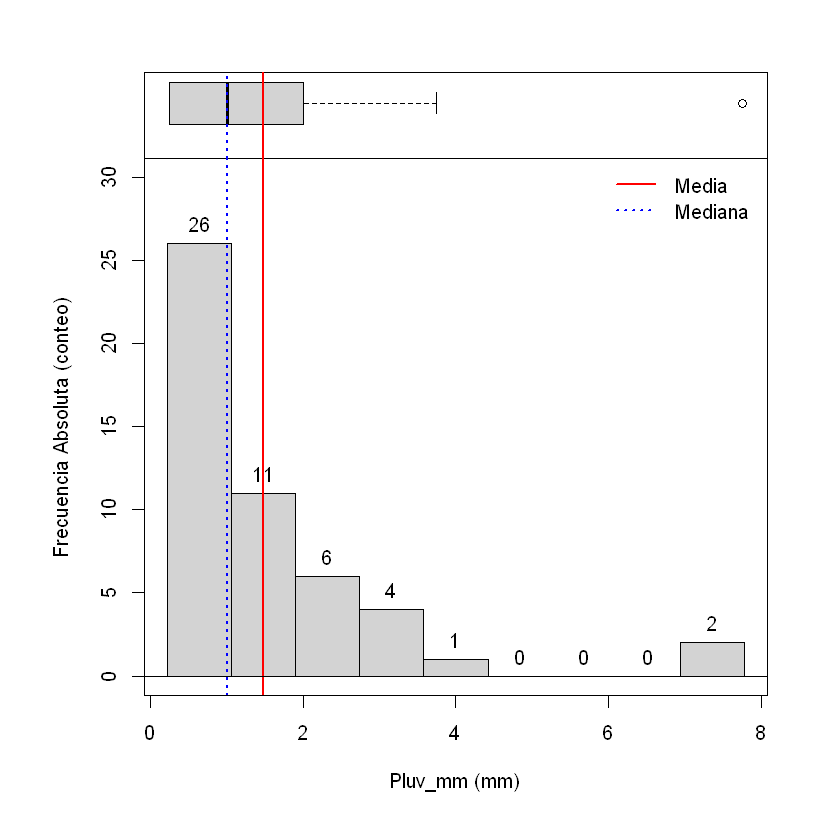

In [41]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

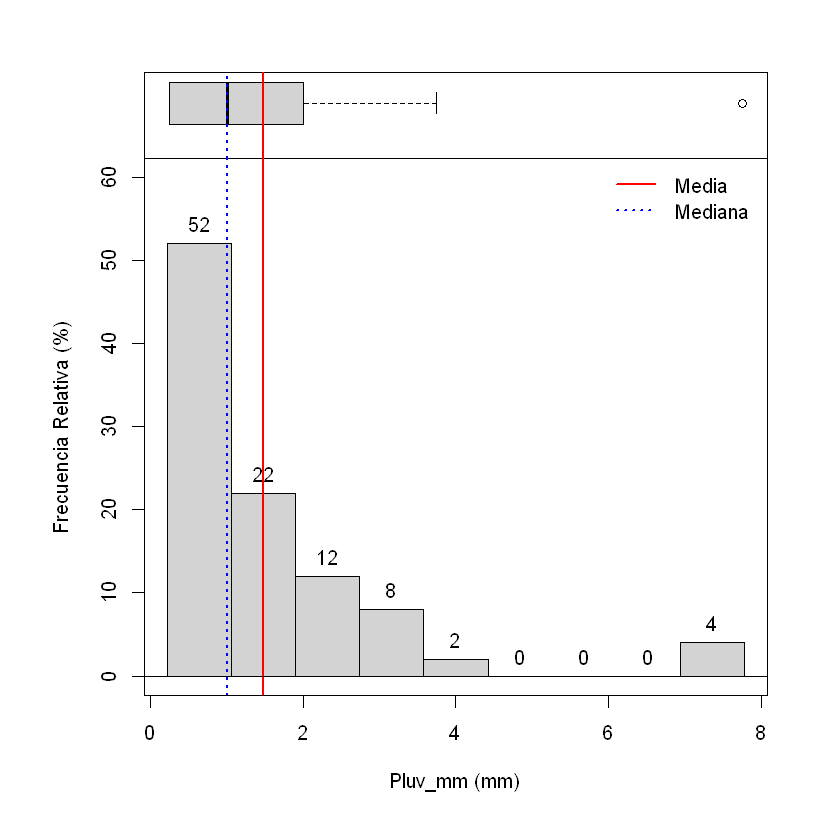

In [42]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Podemos notar que la diferencia entre la media y la mediana es de 0.47, lo cual nos indica que la variable es asim√©trica positiva y el histograma nos confirma esta informaci√≥n.

$\textbf{Transformaci√≥n logar√≠tmica.}$

Analizando el histograma podemos notar un fuerte crecimiento en la parte izquierda, por lo tanto usaremos la transformaci√≥n logar√≠tmica.

In [43]:
Pluv_mm_Log <- log(Pluv_mm)
Pluv_mm_Log_Stat <- Estadisticas(Pluv_mm_Log)
Pluv_mm_Log_Stat

Statistics         Values  
muestras   n                   50.0000
minimos    Minimum             -1.3863
cuantiles1 1st. Quartile       -1.2130
medianas   Median               0.0000
medias     Mean                -0.0903
cuantiles3 3rd. Quartile        0.6598
maximos    Maximum              2.0477
rangos     Rank                 3.4340
rangosInt  Interquartile Rank   1.8728
varianzas  Variance             1.0004
desvs      Standard Deviation   1.0002
CVs        Variation Coeff.   -11.0754
simetrias  Skewness             0.1124
curtosiss  Kurtosis             2.0120

Los histogramas de la transformaci√≥n logar√≠tmica son los siguientes:

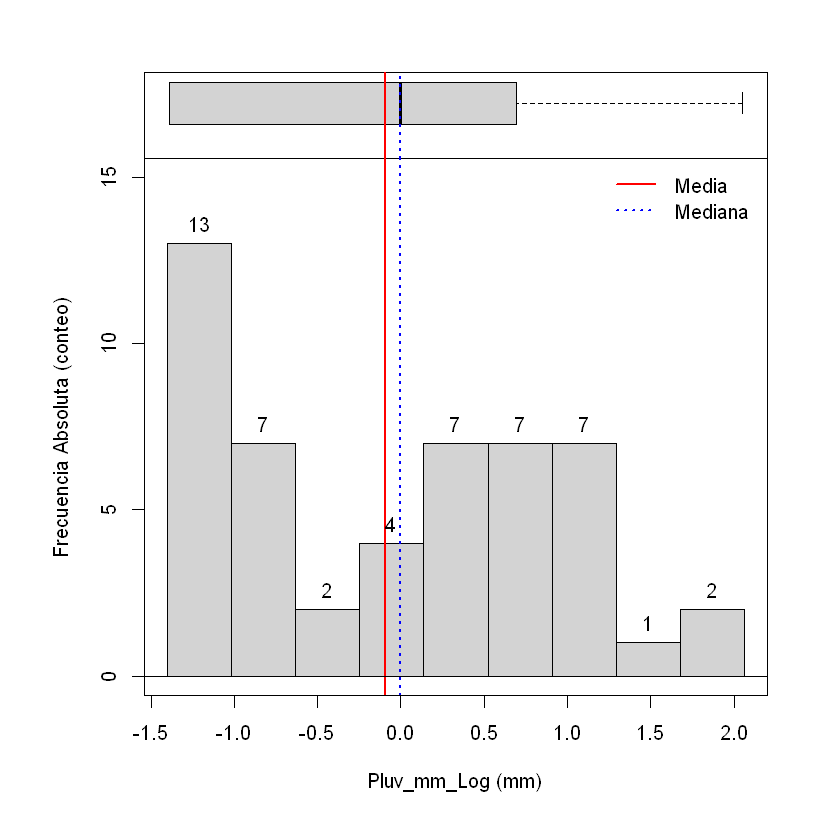

In [44]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

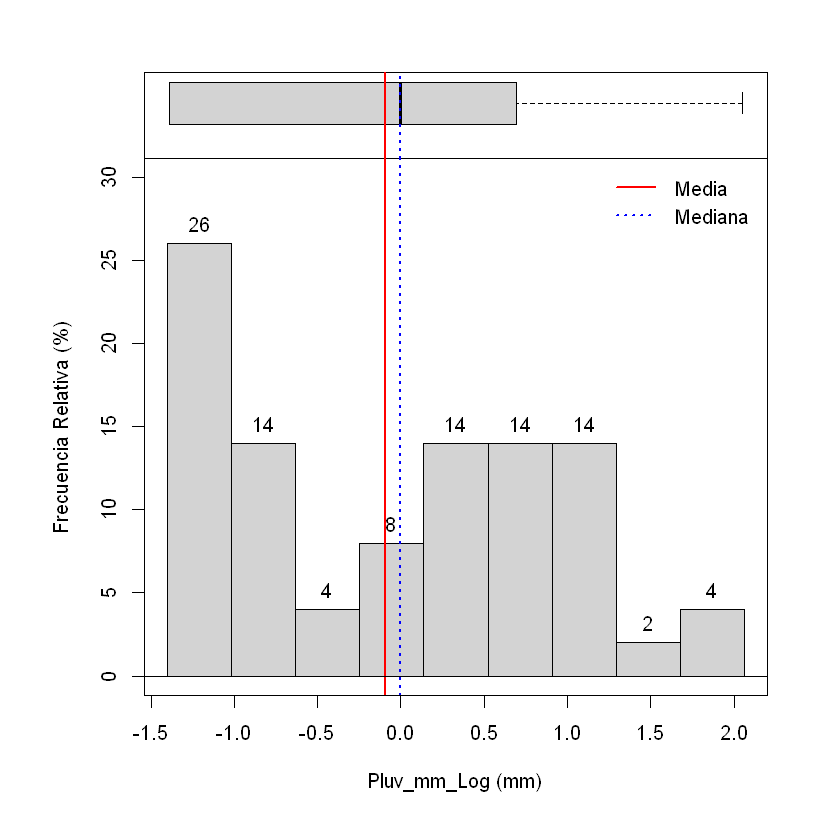

In [45]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana pas√≥ de 0.47 a 0.09, lo cual es bajo. El boxplot no muestra valores at√≠picos, sin embargo, nos aseguraremos que esto sea cierto usando la funci√≥n "OutliersPos".

In [46]:
Pluv_mm_Log_outliers<-OutliersPos(Pluv_mm_Log)
print(Pluv_mm_Log_outliers)

numeric(0)


No se encontraron valores at√≠picos, por lo tanto, aqu√≠ se termina el an√°lisis univariado de esta variable.

## An√°lisis estad√≠stico bivariado.

Como pudimos notar durante el an√°lisis exploratorio univariado, necesitamos de dos elementos para interpretar las caracter√≠sticas estad√≠sticas de una variable: un histograma y una tabla con los valores estad√≠sticos. Con el caso del an√°lisis exploratorio bivariado necesitamos un diagrama de dispersi√≥n o scatterplot y los grados de dependencia.

Un diagrama de dispersi√≥n es una gr√°fica compuesta por pares de valores de dos variables aleatorias $(x_i,y_i)$.

Los grados de dependencia se miden usando el coeficiente de correlaci√≥n lineal de Pearson:

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}==\frac{Cov(X,Y)}{\sqrt(Var(X)Var(Y))}$$

El coeficiente de correlaci√≥n de Spearman:

$$\rho=1-\frac{6\sum{D^2}}{N(N^2-1)}$$

Y el coeficiente de correlaci√≥n de Kendall:

$$\tau=\frac{{\textit{ùëõ√∫ùëöùëíùëüùëú ùëëùëí ùëùùëéùëüùëíùë† ùëêùëúùëõùëêùëúùëüùëëùëéùëõùë°ùëíùë†‚àíùëõ√∫ùëöùëíùëüùëú ùëëùëí ùëùùëéùëüùëíùë† ùëëùëñùë†ùëêùëúùëüùëëùëéùëõùë°ùëíùë†}}}{\bigl(\begin{smallmatrix}n\\ 2\end{smallmatrix}\bigr)}$$

### C√°lculo de grados de dependencia

Para calcular estos grados de dependencia lo hacemos de la siguiente forma:

In [47]:
cor(Radar_mm , Pluv_mm, method = "pearson")

[1] 0.9410485

In [48]:
cor(Radar_mm , Pluv_mm, method = "spearman")

[1] 0.8480453

In [49]:
cor(Radar_mm , Pluv_mm, method = "kendall")

[1] 0.7187151

Respecto al coeficiente de Pearson, su valor es de 0.9410, lo cual podemos considerar como cuasi-lineal. Sin embargo, los valores de la correlaci√≥n de Spearman (0.8480) y Kendall (0.7187) indican que el modelo no es cuasi-lineal, por lo que es posible que la dependencia lineal est√© alterada por valores at√≠picos.

### Diagrama de dispersi√≥n.

El diagrama de dispersi√≥n se grafica de la siguiente manera:

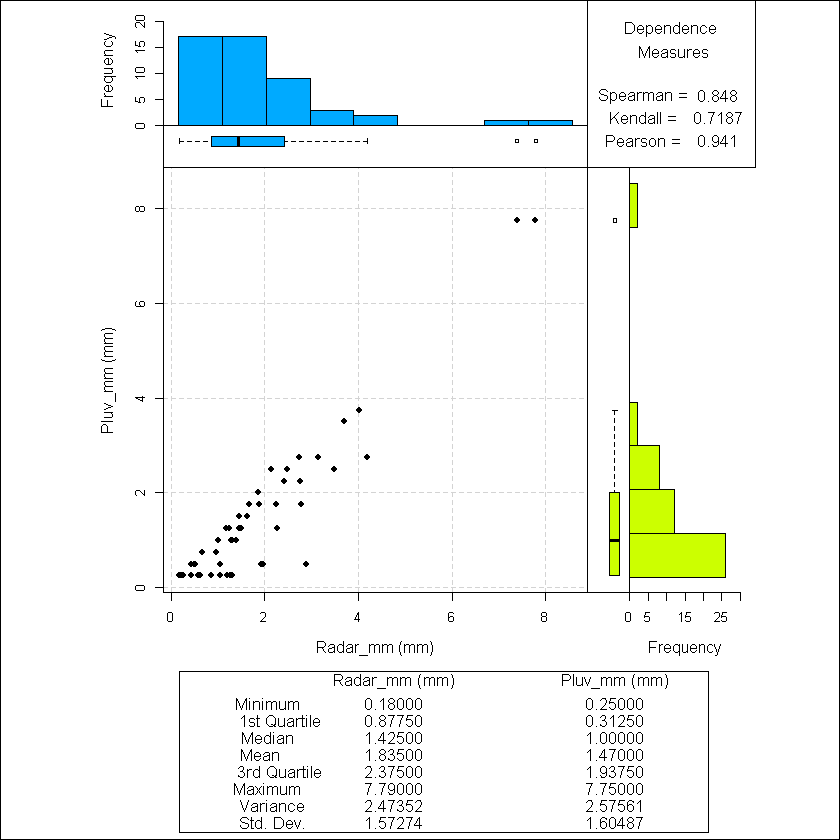

In [50]:
ScatterPlot(Radar_mm , Pluv_mm, 9, 
            Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
            Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
            XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

Podemos notar en el gr√°fico de dispersi√≥n que hay dos pares at√≠picos localizados en la esquina superior derecha, los cuales podr√≠an ser la causa de la cuasi-linearidad que indica la medida de dependencia de Pearson. Estos valores coinciden con los valores at√≠picos que se detectaron durante el an√°lisis univariado, Sin embargo, es importante se√±alar que los valores at√≠picos encontrados en el an√°lisis exploratorio univariado no son necesariamente valores at√≠picos en el an√°lisis exploratorio bivariado, se debe evaluar la conveniencia de retirar cada par.

### Analisis de regresi√≥n lineal.

Como se mencion√≥ en clase, la regresi√≥n trata de establecer relaciones funcionales entre variables aleatorias, en este caso, la relaci√≥n se establece con una recta. Para hacer el an√°lisis necesitamos de los par√°metros de la recta y el an√°lisis de residuos.

El grafico de dispersi√≥n con l√≠nea de regresi√≥n se genera de la siguiente forma:

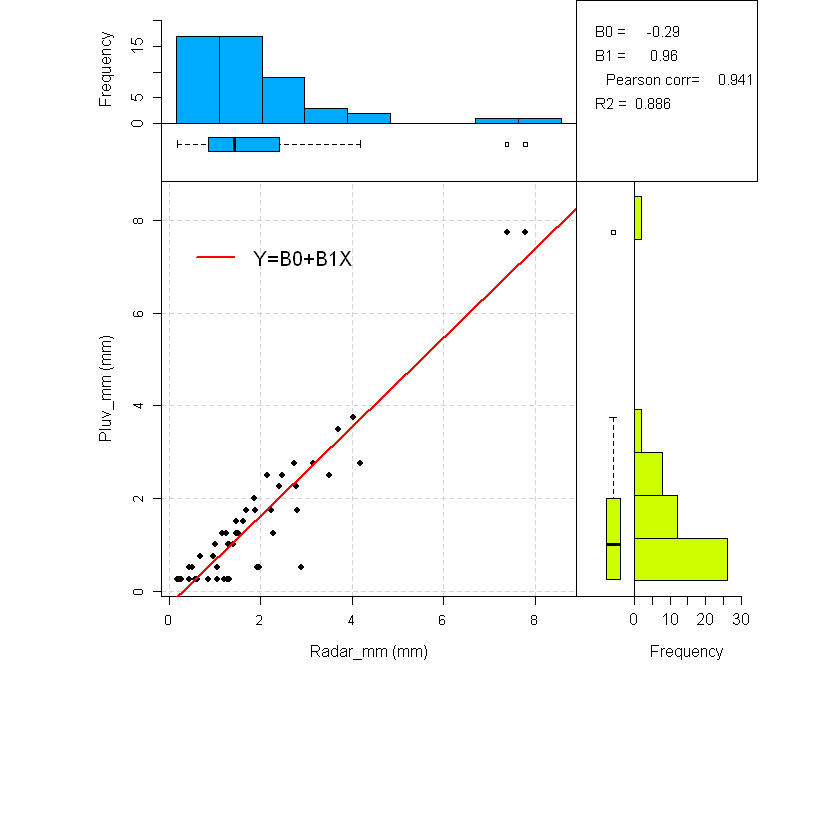

In [51]:
scaterplotReg(Radar_mm , Pluv_mm, 9, 
              Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
              Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
              XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

De este grafico nos interesa saber los valores de la regresi√≥n lineal y su error cuadratico. Para hacer la regresi√≥n lineal usamos la funci√≥n "linear_regression":

In [52]:
# Linear Regression
X<-Radar_mm
Y<-Pluv_mm

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
  -0.292099

X 
0.9602719

Ya que tenemos los par√°metros de la recta $B_0$ y $B_1$, hacemos el calculo de los residuos.

In [53]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Ya que tenemos calculados los residuos necesitamos obtener sus valores estad√≠sticos.

In [54]:
Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Residual_Stat.csv")
Y_Residual_Stat

Statistics         Values       
muestras   n                   5.000000e+01
minimos    Minimum            -1.973500e+00
cuantiles1 1st. Quartile      -1.988000e-01
medianas   Median              1.562000e-01
medias     Mean                0.000000e+00
cuantiles3 3rd. Quartile       3.552000e-01
maximos    Maximum             9.457000e-01
rangos     Rank                2.919200e+00
rangosInt  Interquartile Rank  5.540000e-01
varianzas  Variance            2.947000e-01
desvs      Standard Deviation  5.429000e-01
CVs        Variation Coeff.   -2.318152e+17
simetrias  Skewness           -1.347400e+00
curtosiss  Kurtosis            5.138200e+00

Y tambien necesitamos obtener el histograma de estos residuos.

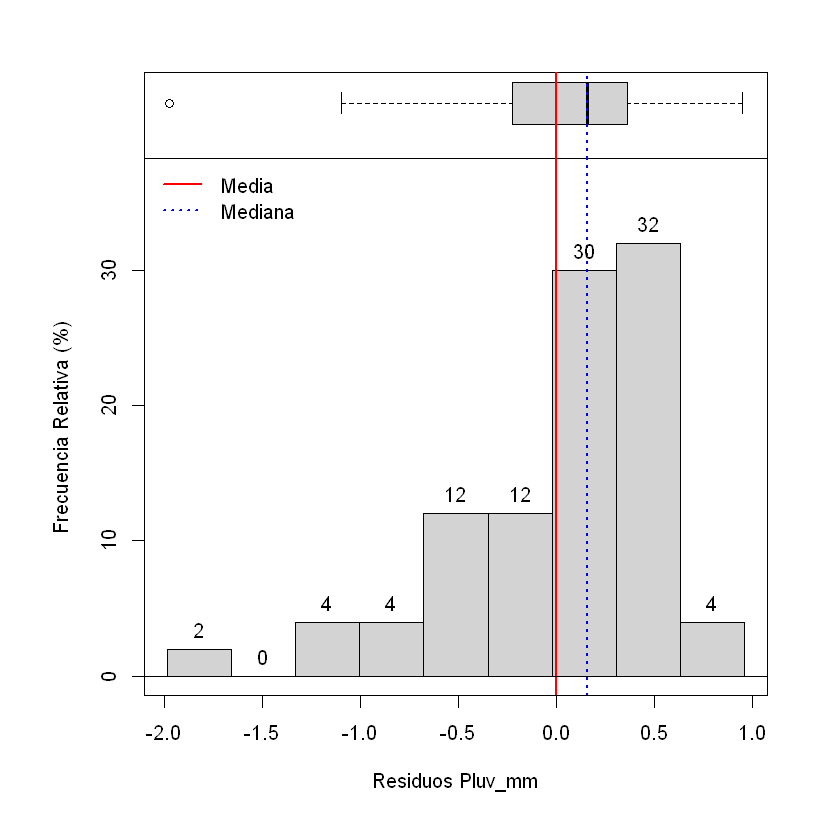

In [55]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

Si analizamos los valores estad√≠sticos y el histograma de los residuos, podemos notar que el valor esperado es de 0, su varianza es de 0.2947 y la diferencia entre la media y la mediana es de 0.1562, lo cual nos indica que tiene asimetr√≠a negativa, por lo tanto, los residuos no cumplen con todas las condiciones que demanda la regresi√≥n lineal.

$start.arg
$start.arg$mean
[1] -2.341877e-18

$start.arg$sd
[1] 0.5374263


$fix.arg
NULL



Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


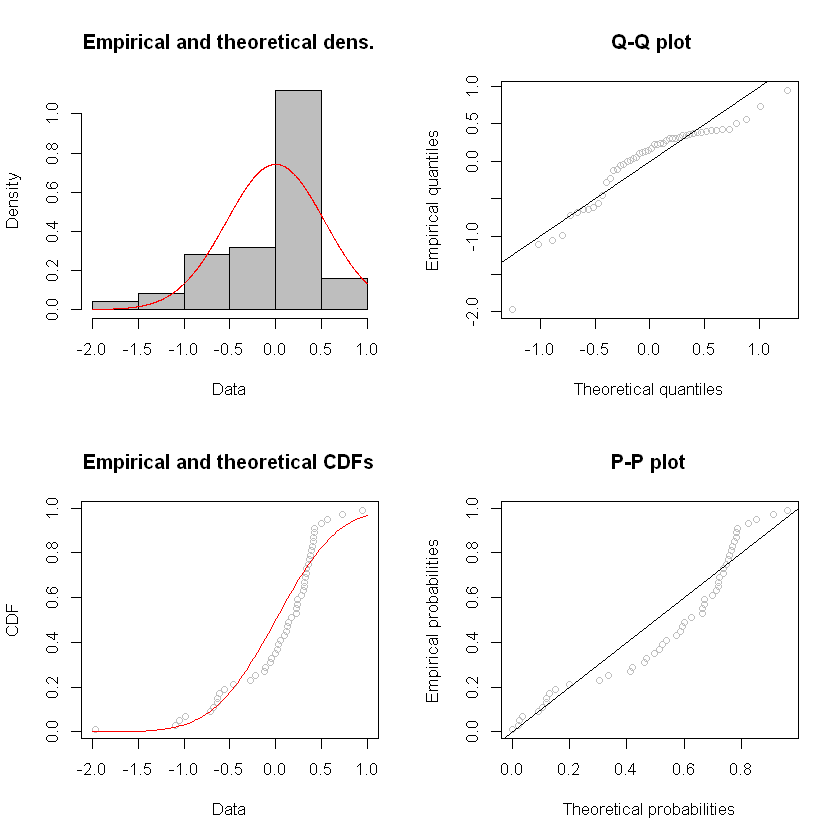

In [56]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "gray",  DistName = "Normal")

Para confirmar que los residuos no cumplen con las condiciones de la regresi√≥n lineal podemos sobreponer el histograma con la distribuci√≥n normal (figura superior izquierda), ah√≠ podemos ver que una de las barras del histograma sobrepasa a la funci√≥n de distribuci√≥n. El grafico Q-Q plot (figura superior derecha) tambi√©n muestra que solo unas pocas muestras est√°n en la recta. La grafica comparativa entre las funciones de distribuci√≥n acumulativas emp√≠rica y te√≥rica (figura inferior izquierda) no muestran un buen ajuste Y en el caso del grafico P-P plot (figura inferior derecha) solo las muestras de la esquina inferior izquierda y unas pocas de la parte central se posicionan cerca de la recta.

Ahora debemos aplicar un test de normalidad, en este caso tenemos dos opciones: hip√≥tesis de Kolmogorov-Smirnov y la hip√≥tesis de Anderson-Darling.

La hip√≥tesis de Kolmogorov-Smirnov se usa para contrastar la hip√≥tesis de normalidad, el estad√≠stico de prueba es la m√°xima diferencia:

$$D=m√°x|F_n(x)-F_{va}(x)|$$

Donde $F_n(x)$ es la funci√≥n de distribuci√≥n param√©trica, en este caso la funci√≥n normal. Y $F_{va}(x)$ es la funci√≥n de la variable aleatoria.

La hip√≥tesis de Anderson-Darling es una prueba no param√©trica que se basa en la comparaci√≥n de las muestras $\textbf{Y}$ y la funci√≥n de distribuci√≥n de probabilidad te√≥rica $\textbf{F}$. Su f√≥rmula es:

$$S=\sum_{k=1}^{N}\frac{2k-1}{N}\left[ln(F(Y_k))+ln(1-F(Y_{N+1-k}))\right]$$

El valor p es una probabilidad que mide la evidencia en contra de la hip√≥tesis nula. Un valor p m√°s peque√±o proporciona una evidencia m√°s fuerte en contra de la hip√≥tesis nula. esta hipotesis se usa para determinar si los datos siguen una distribuci√≥n normal.

Si $p\leq a$ donde a es el nivel de significancia la decisi√≥n es rechazar la hip√≥tesis nula y concluir que sus datos no siguen una distribuci√≥n normal.

Si $p>a$ donde a es el nivel de significancia la decisi√≥n es no rechazar la hip√≥tesis nula y concluir que sus datos no tiene suficiente evidencia para concluir que los datos no siguen una distribuci√≥n normal.

In [57]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre             Nivel de significancia P-valor Estad?stico Decisi?n     
1 Kolmogorov-Smirnov 0.05                   0.136   0.1605      No rechazo H0
2 Anderson-Darling   0.05                   0.07826 2.13        No rechazo H0

Bajo la prueba de Kolmogorov-Smirnov podemos ver que la normalidad de los residuos es de no rechazo. Mientras que la prueba de Anderson-Darling no rechaza la hip√≥tesis de normalidad. Sin embargo, los valores obtenidos de estas pruebas son muy cercanos al nivel de significancia, por lo que podr√≠amos reforzar la evidencia de no normalidad de la variable.

In [58]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

Normal       
Media                -2.341877e-18
Desviaci?n est?ndar   5.374263e-01
M?xima Verosimilitud -3.989875e+01
AICC                  8.379750e+01

Los siguientes gr√°ficos son los mismos que se analizaron en el vector "FitDistr2_Residual_normal", tenemos el histograma la funcion de distribuci√≥n normal.

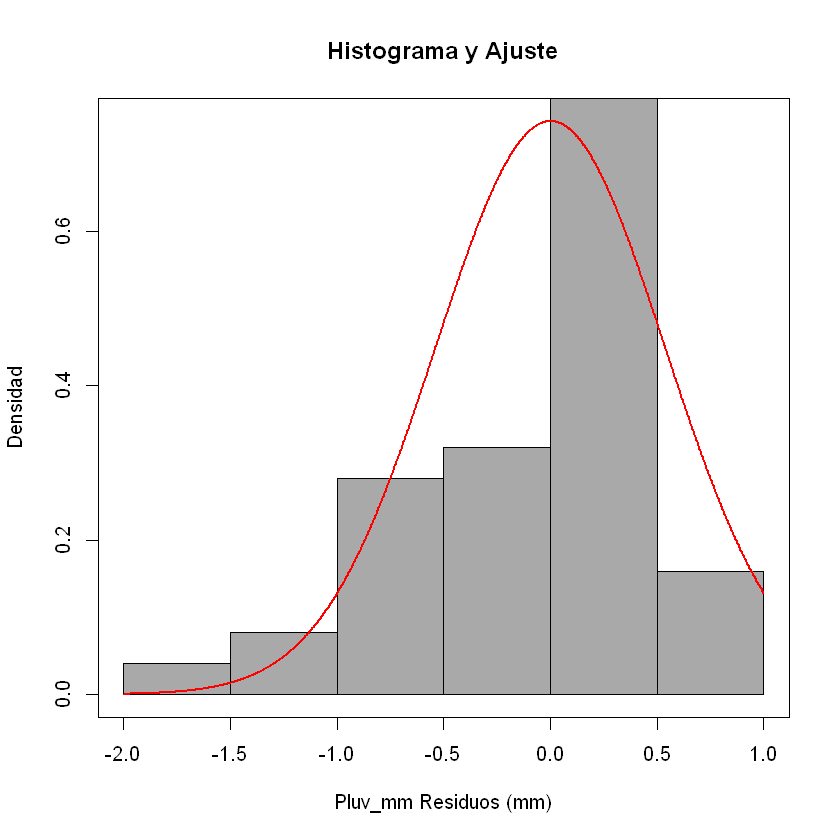

In [59]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos su funci√≥n de distribuci√≥n acumulativa.

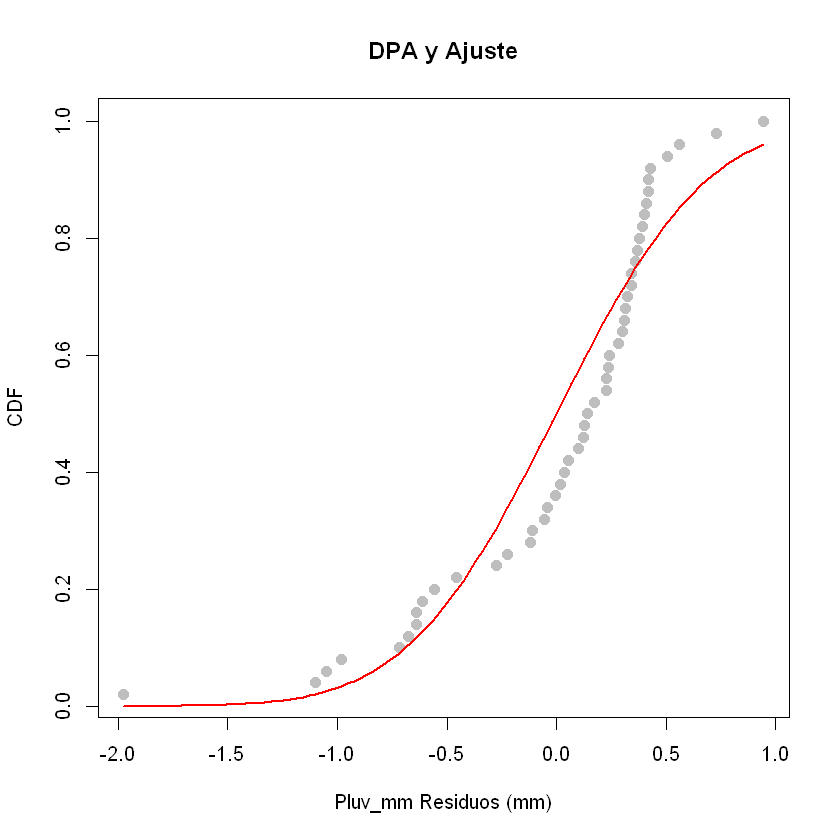

In [60]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot).

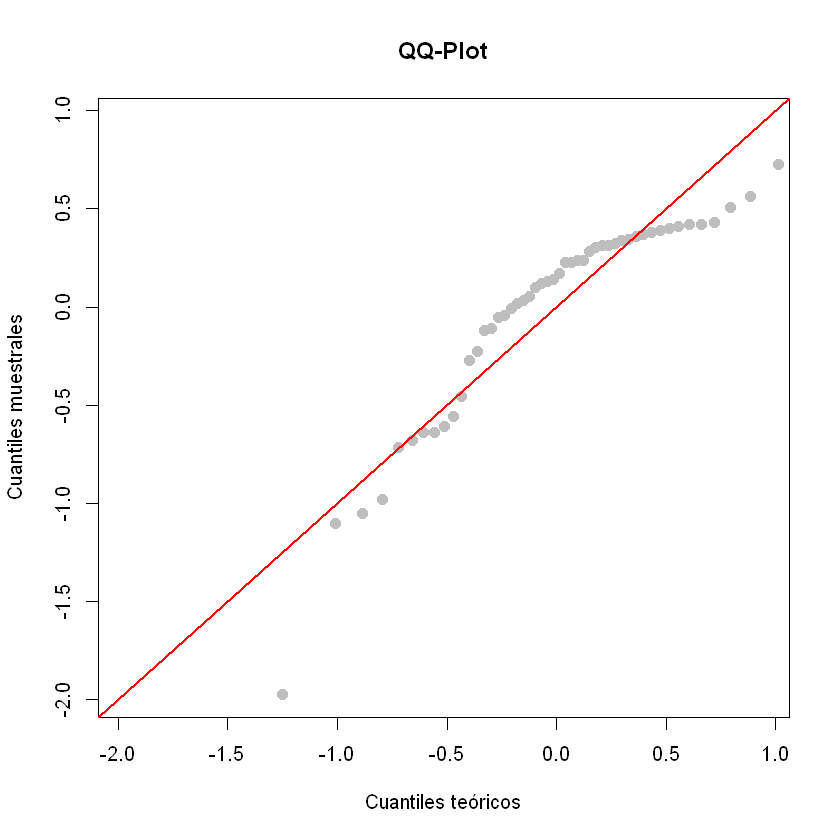

In [61]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles te√≥ricos", 
       lcol = "red", lwd = 2)

El Grafico percentil-percentil (P-P plot).

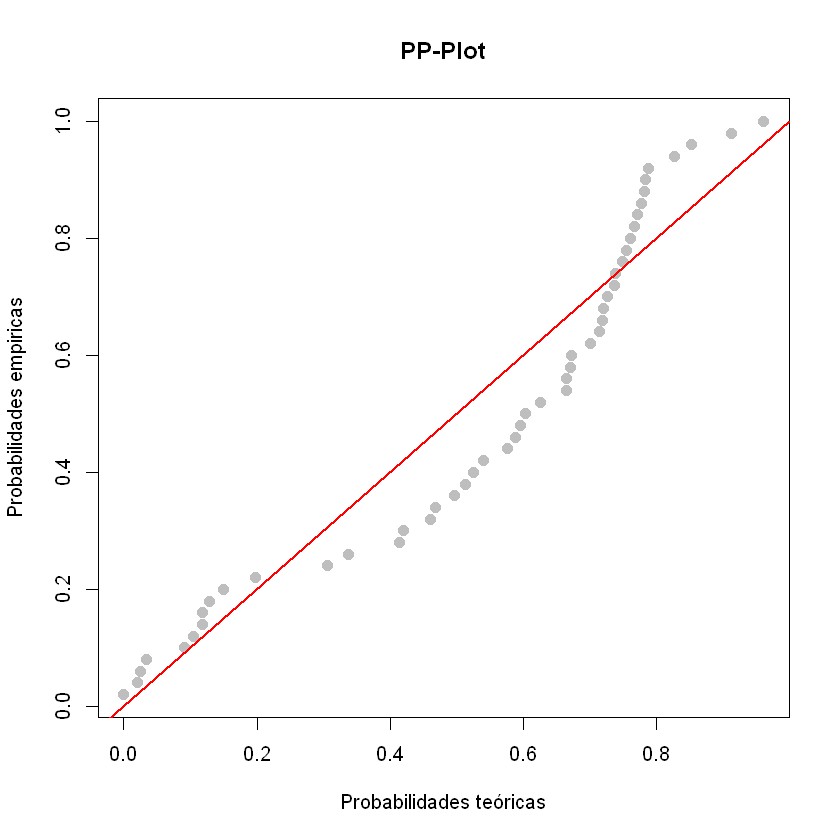

In [62]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades te√≥ricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.

Ahora necesitamos evaluar si los valores obtenidos del pluvi√≥metro tienen una relaci√≥n con los residuos, para esto necesitamos el gr√°fico de dispersi√≥n. El cual generamos de la siguiente forma:

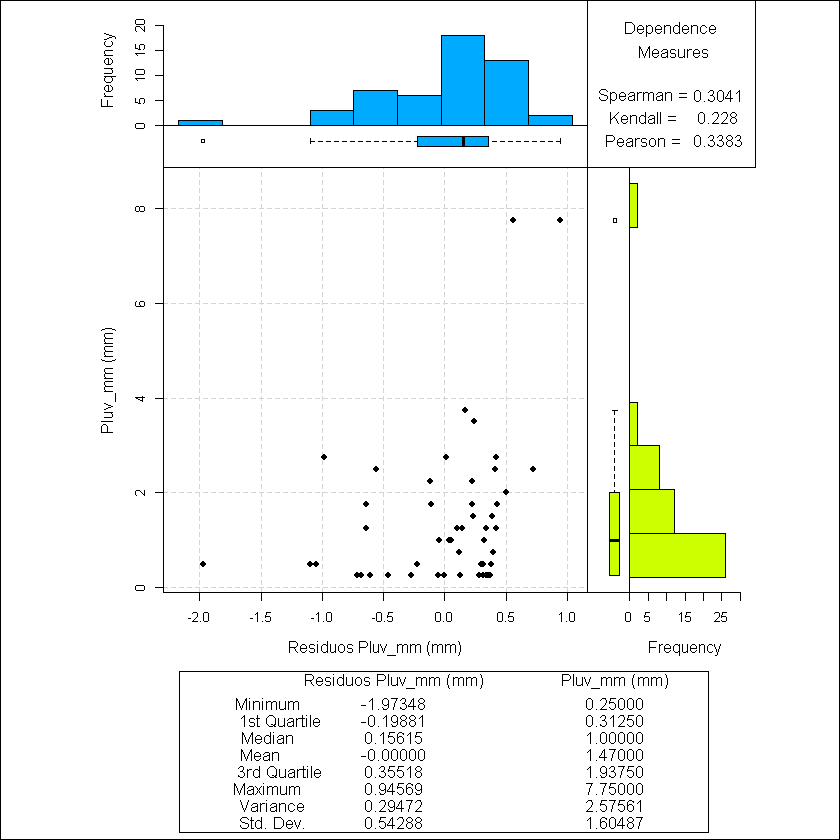

In [63]:
X<-Y_Residual   # Y_Residual is the independent variable

Y<-Pluv_mm      # Pluv_mm is the dependent variable

ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], XLAB = "Residuos Pluv_mm (mm)", YLAB = "Pluv_mm (mm)")

En este grafico podemos notar que la medida de dependencia lineal de Pearson es de 0.339, Spearman es de 0.3041 y Kendall es de 0.228. Esto nos da como conclusi√≥n que la regresi√≥n lineal no cumple con la condici√≥n no correlaci√≥n entre los residuos y las muestras del pluvi√≥metro.

## An√°lisis estad√≠stico bivariado con variables transformadas.

Ahora haremos el caso donde las variables (Radar_mm, Pluv_mm) tienen transformada logar√≠tmica. Se escogi√≥ que las variables aleatorias usen esta transformaci√≥n por los resultados que se tuvieron con la variable aleatoria de las muestras obtenidas con el pluvi√≥metro.

### Grafico de dispersi√≥n.

En el grafico de dispersi√≥n podemos notar que las medidas de dependencia tienen los siguientes valores:

* Spearman (0.848)
* Kendall (0.7187)
* Pearson (0.8256)

Si comparamos las medidas de dependencia de este an√°lisis estad√≠stico bivariado con el anterior an√°lisis podemos notar que el coeficiente de correlaci√≥n de Pearson cambi√≥ de 0.9410 a 0.8256, mientras que los coeficientes de Spearman y Kendall se mantuvieron. esto muestra una gran ventaja al usar los coeficientes de Spearman y Kendall ya que no se ven afectados ante transformaciones.

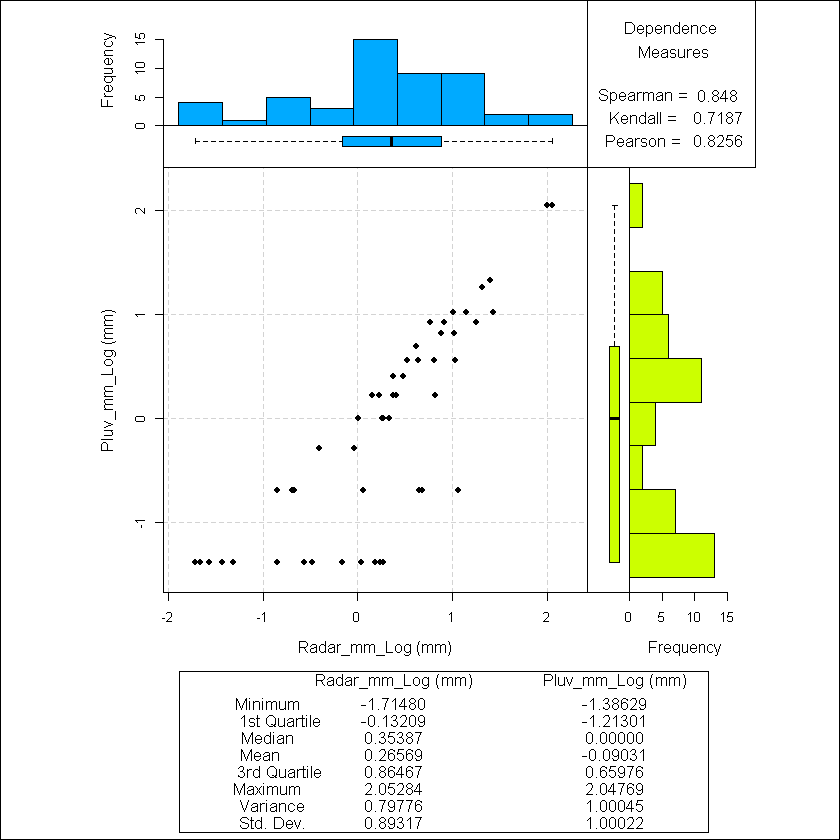

In [64]:
ScatterPlot(Radar_mm_Log , Pluv_mm_Log, 9, 
            Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

### Analisis de regresi√≥n lineal.

Ahora obtendremos los valores de la regresi√≥n lineal .

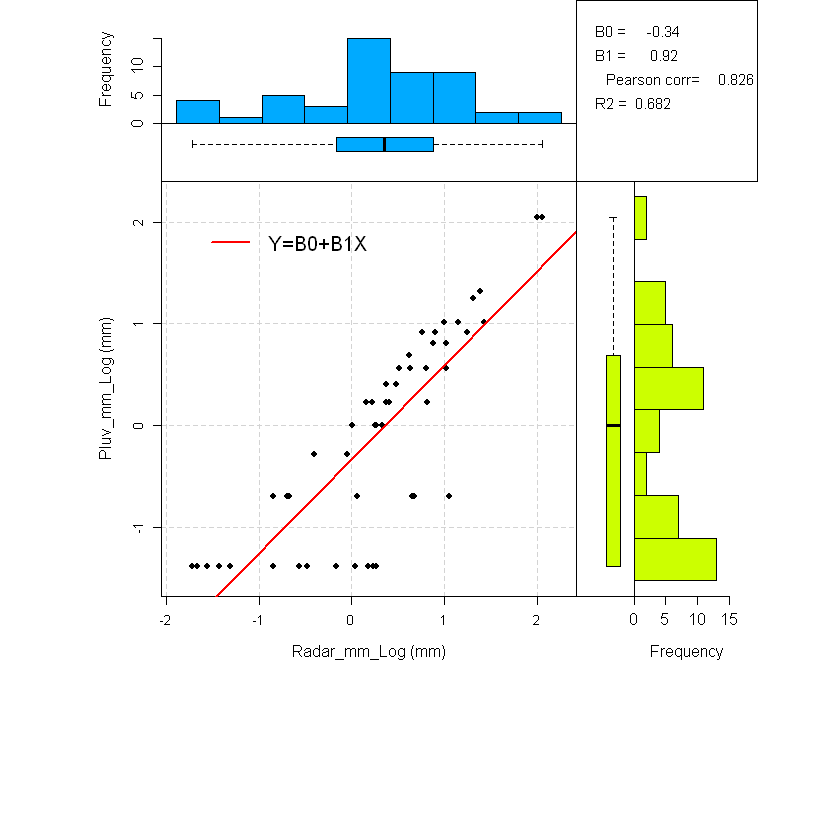

In [65]:
scaterplotReg(Radar_mm_Log , Pluv_mm_Log, 9, 
              Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
              Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
              XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

los valores de la regresi√≥n lineal son:

In [66]:
# Linear Regression
X<-Radar_mm_Log
Y<-Pluv_mm_Log

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
 -0.3359718

X 
0.9246077

Procedemos a calcular los residuos

In [64]:
X<-Radar_mm_Log
Y<-Pluv_mm_Log

Y_Regression <- B0 + B1*X
Y_Residual <- Y-Y_Regression

Y calculamos sus estad√≠grafos e histograma.

In [67]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Log_Residual_Stat.csv")
Y_Residual_Stat

Statistics         Values       
muestras   n                   5.000000e+01
minimos    Minimum            -1.335200e+00
cuantiles1 1st. Quartile      -1.624000e-01
medianas   Median              2.373000e-01
medias     Mean                0.000000e+00
cuantiles3 3rd. Quartile       3.924000e-01
maximos    Maximum             5.445000e-01
rangos     Rank                1.879700e+00
rangosInt  Interquartile Rank  5.548000e-01
varianzas  Variance            3.184000e-01
desvs      Standard Deviation  5.643000e-01
CVs        Variation Coeff.    1.454272e+17
simetrias  Skewness           -1.264700e+00
curtosiss  Kurtosis            3.224800e+00

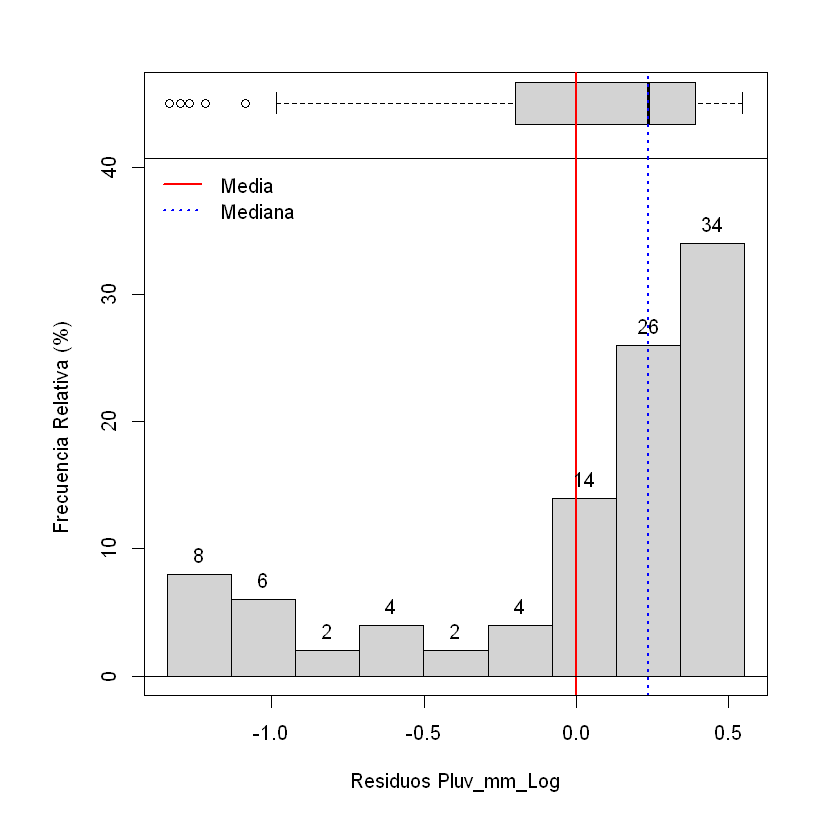

In [68]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm_Log", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

En este caso podemos ver que el histograma presenta asimetr√≠a negativa con cuatro valores at√≠picos localizados a la izquierda. La diferencia entre la media y la mediana es de 0.2373, la cual es alta.

$start.arg
$start.arg$mean
[1] 3.88036e-18

$start.arg$sd
[1] 0.5586384


$fix.arg
NULL



Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


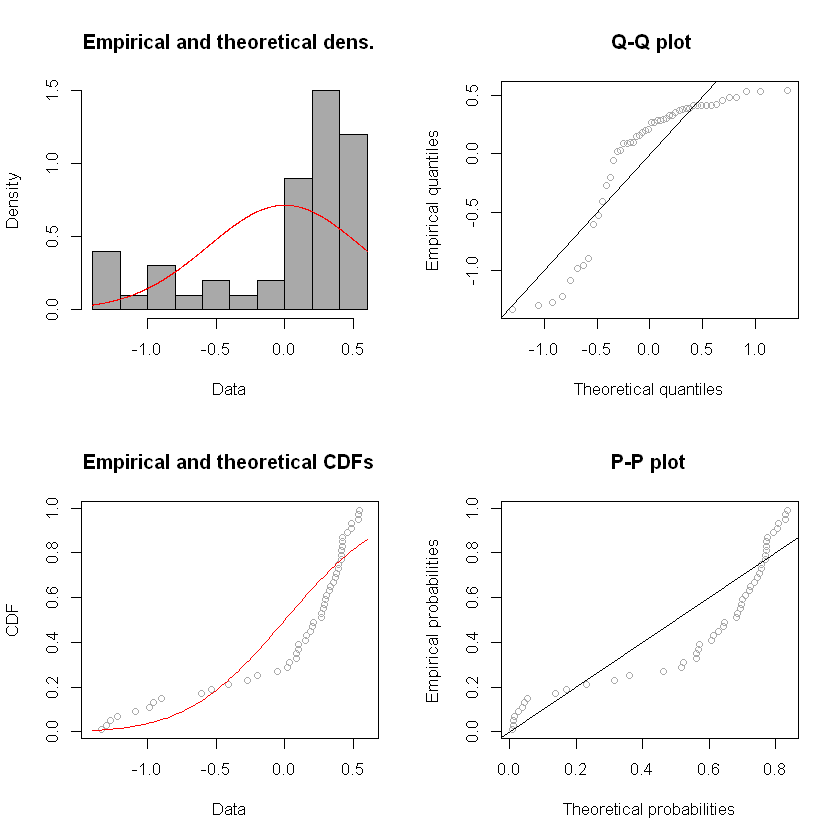

In [70]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "darkgray", DistName = "Normal")

Analizando los residuos podemos notar que el histograma con la distribuci√≥n normal (figura superior izquierda) nos muestra que los residuos no son normales, en especial los valores localizados a los extremos del histograma. El grafico Q-Q plot (figura superior derecha) tambi√©n muestra que pocas muestras est√°n en la recta. La grafica comparativa entre las funciones de distribuci√≥n acumulativas emp√≠rica y te√≥rica (figura inferior izquierda) no muestra un buen ajuste y en el caso del grafico P-P plot (figura inferior derecha) hay muy pocas muestras cercanas a la recta. Con esto podemos concluir que los residuos no cumplen con los requisitos de la regresi√≥n lineal.

In [71]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre             Nivel de significancia P-valor  Estad?stico Decisi?n  
1 Kolmogorov-Smirnov 0.05                   0.004802 0.2412      Rechazo H0
2 Anderson-Darling   0.05                   0.006424 4.282       Rechazo H0

Las pruebas de normalidad de Kolmogorov-Smirnov y Anderson-Darling confirman lo analizado con los graficos.

In [72]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

Normal       
Media                 3.880360e-18
Desviaci?n est?ndar   5.586384e-01
M?xima Verosimilitud -4.183428e+01
AICC                  8.766856e+01

Graficamos las comparativas entre el histrograma y la funcion de distribuci√≥n normal.

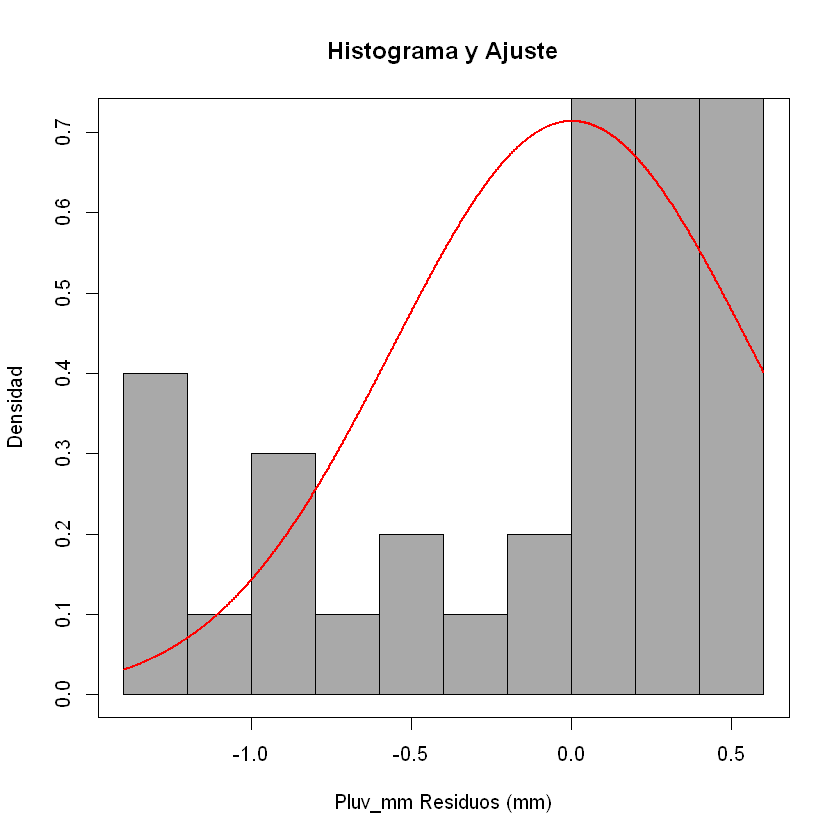

In [73]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos las comparativas entre la funci√≥n de distribuci√≥n acumulativa emp√≠rica y la funci√≥n de distribuci√≥n acumulativa normal.

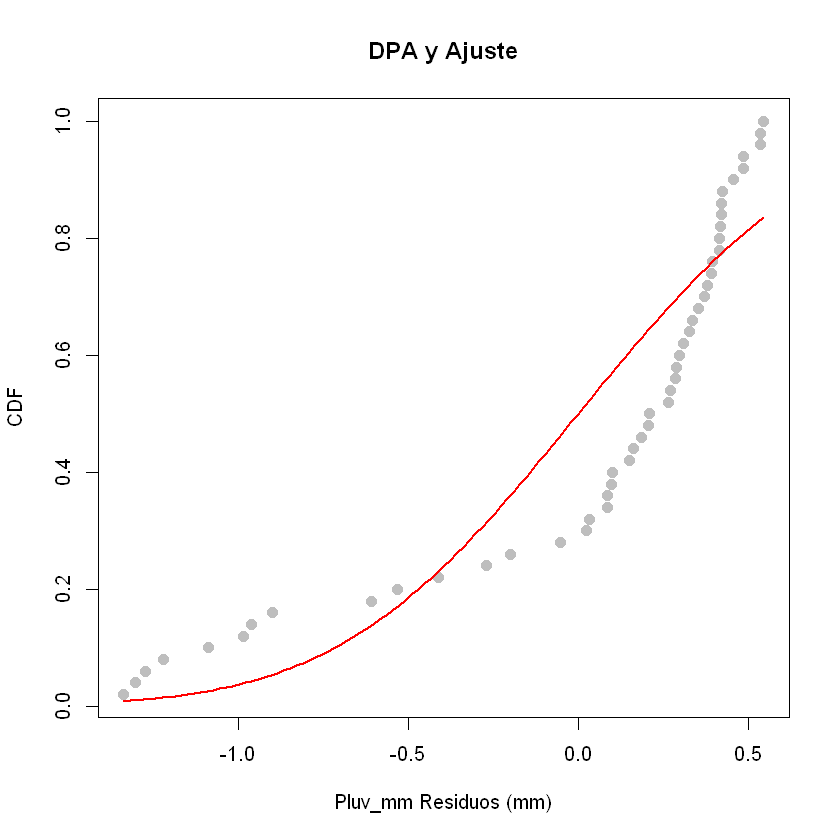

In [74]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot). 

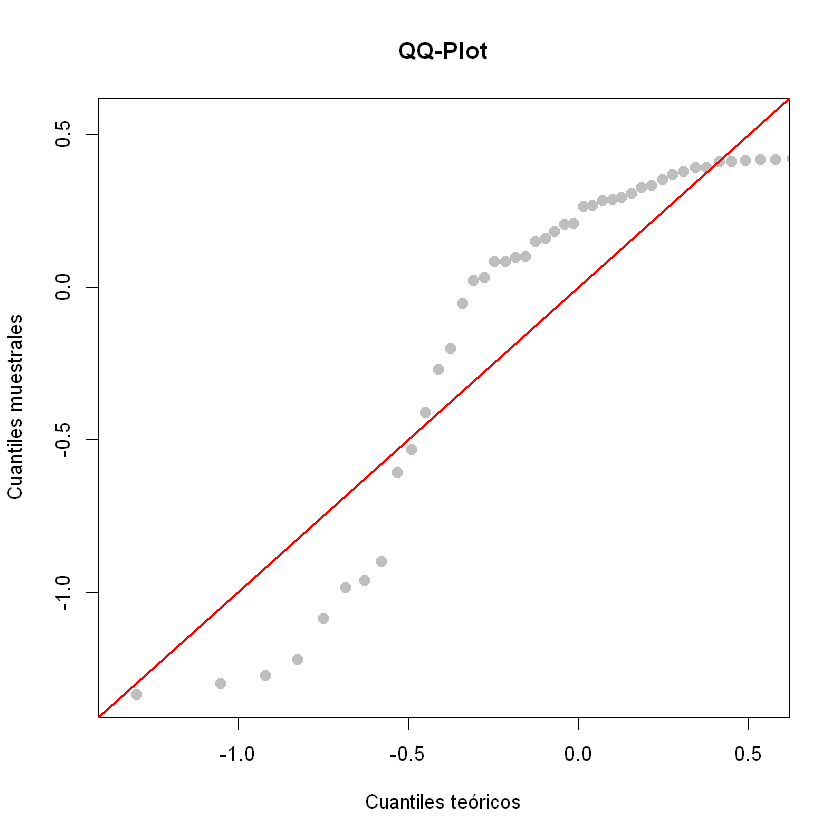

In [75]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles te√≥ricos", 
       lcol = "red", lwd = 2)


El Grafico Percentil-percentil (P-P plot).

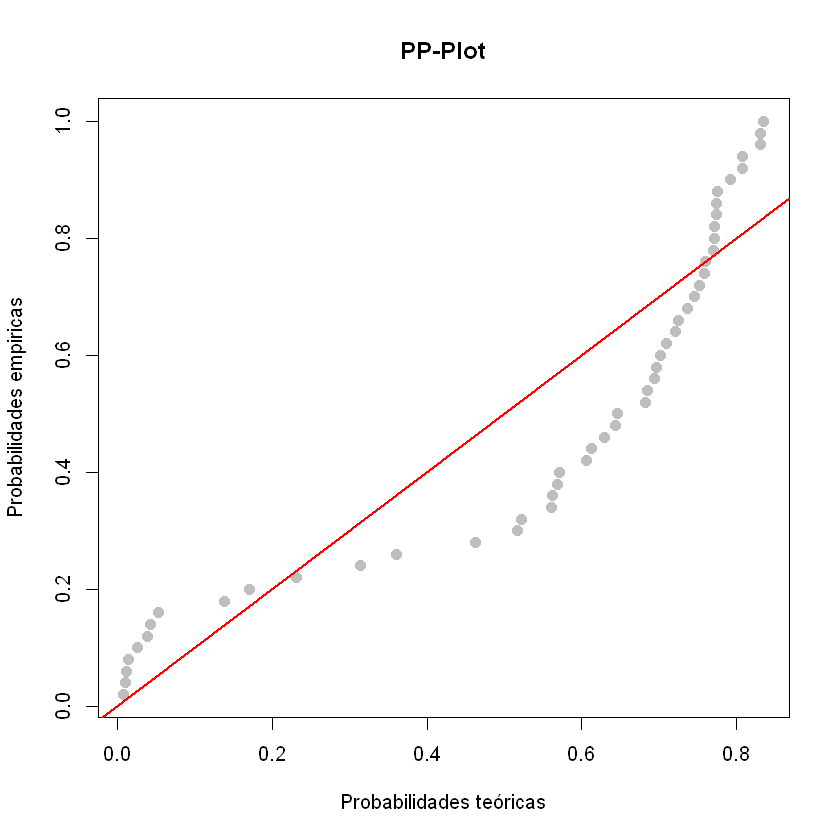

In [76]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades te√≥ricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.


In [77]:
X<-Y_Residual     # Y_Residual es la variable invependiente
Y<-Pluv_mm_Log    # Pluv_mm_Log es la variable dependiente

Ahora Analizaremos la dependencia entre la variable aleatoria con transformaci√≥n logar√≠tmica y sus residuos. Se hace el grafico de dispersi√≥n.

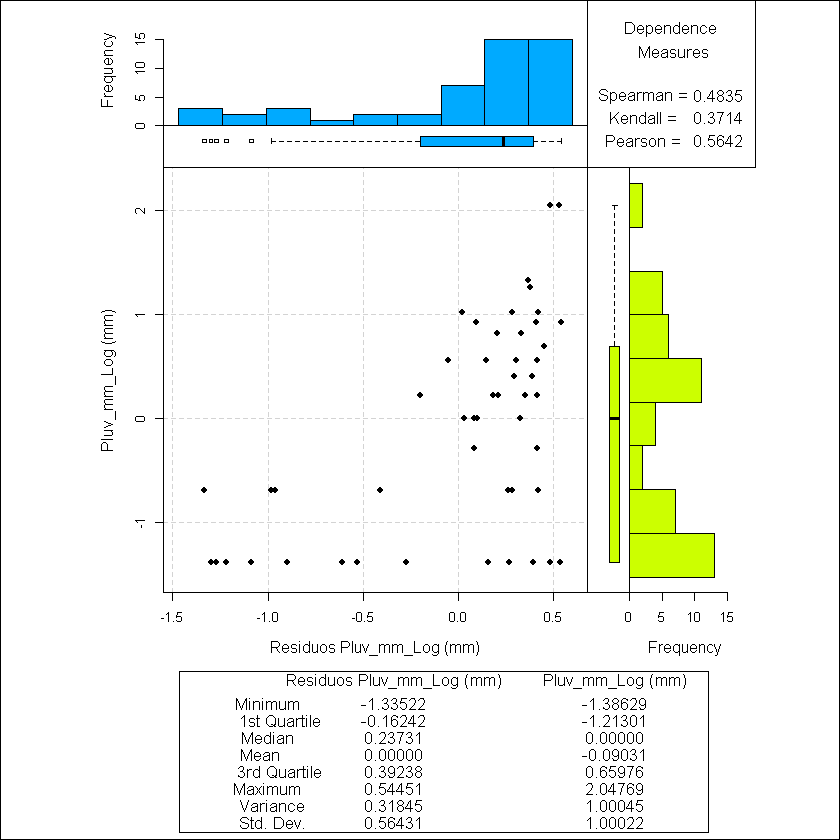

In [78]:
ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], XLAB = "Residuos Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

El resultado de las medidas de dependencia muestra que la dependencia es considerable. Pearson tiene un valor de 0.5702, Spearman es de 0.4971 y Kendall es de 0.3818. Con esta √∫ltima prueba podemos concluir que la regresi√≥n lineal usando las variables aleatorias transformadas no cumpli√≥ con ninguna de las condiciones.

Con el caso de las muestras obtenidas de los pluvi√≥metros, podemos ver que los valores at√≠picos se localizan en los mismos lugares de los valores at√≠picos obtenidos del radar meteorol√≥gico, por lo que debemos tomar en cuenta esta informaci√≥n para el an√°lisis variografico.